In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
# Loading the data
data_df = pd.read_csv("City_Service_Requests_in_2018.csv")

In [4]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 30 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null object
RESOLUTIONDATE                280349 non-null object
SERVICEDUEDATE                333096 non-null object
SERVICEORDERDATE              333105 non-null object
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null object
INSPECTORNAME                 0 non-null float64
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   333105 non-null 

In [5]:
# parsing the dates and converting them to datetime format
data_df_parsed = pd.read_csv("City_Service_Requests_in_2018.csv", parse_dates = ["ADDDATE","RESOLUTIONDATE","SERVICEDUEDATE","SERVICEORDERDATE","INSPECTIONDATE"])
data_df_parsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 30 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
INSPECTORNAME                 0 non-null float64
SERVICEORDERSTATUS            3331

In [6]:
# Cleaning the data, i.e removing columns not needed "INSPECTORNAME", "CITY", "STATE"
data_df_clean = data_df_parsed.drop(columns=['INSPECTORNAME',"CITY","STATE"])

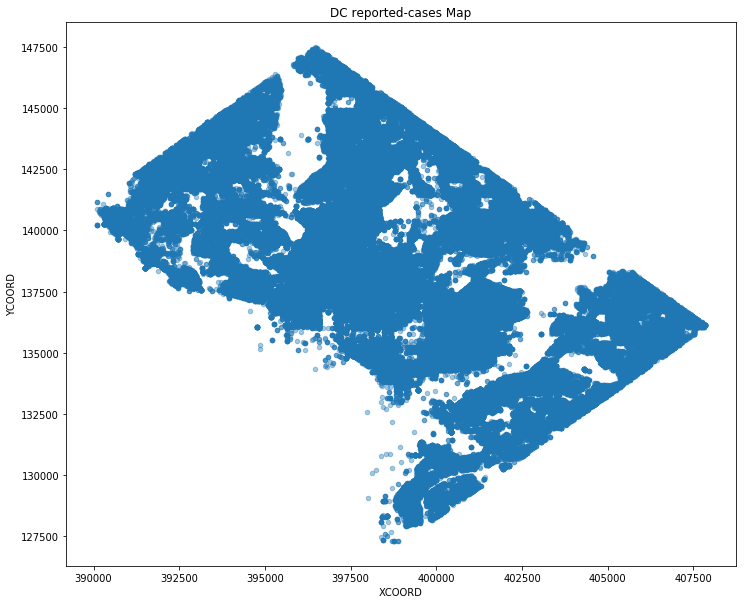

In [7]:
# Okay, so first lets try to visualize if the data is not skewed and covers entire DC by plotting a scatter 
# plot of the latitude and longitude (all the reports in DC)
data_df.plot(kind='scatter',x='XCOORD',y='YCOORD',figsize=(12,10),alpha=0.4)
plt.title("DC reported-cases Map")
plt.savefig("Point_wise_map.png")

In [8]:
data_df_clean["ORGANIZATIONACRONYM"].value_counts()

DPW       211371
DDOT      102265
DMV         6886
DOH         5947
OUC         3824
FEMS        1828
DOEE         643
ORM          315
DC-ICH        21
DDS            4
Name: ORGANIZATIONACRONYM, dtype: int64

In [9]:
#Before doing that lets try to add a new feature telling us time difference taken between a case being reported
# (ADDDATE) and it's resolution date.
data_df_clean['Difference_time'] = data_df_clean['RESOLUTIONDATE'].sub(data_df_clean['SERVICEORDERDATE'], axis=0)

#conerting the time 

In [10]:
data_df_clean['Difference_time']

0         0 days 00:04:03
1        49 days 22:53:03
2        13 days 05:00:52
3         5 days 05:33:24
4         8 days 21:11:08
5        21 days 11:17:56
6        13 days 16:09:28
7         4 days 23:27:42
8         7 days 23:25:49
9         6 days 21:43:27
10       21 days 11:01:13
11        0 days 01:20:02
12        8 days 00:33:57
13       69 days 04:24:23
14       21 days 10:42:41
15        3 days 22:16:36
16        0 days 22:11:57
17        7 days 23:21:17
18        7 days 23:47:34
19        7 days 02:21:41
20       21 days 10:40:18
21        5 days 05:32:47
22        0 days 00:56:49
23        6 days 22:44:40
24        0 days 00:33:39
25        5 days 05:32:59
26        8 days 01:10:18
27       25 days 22:54:31
28        8 days 00:06:02
29       21 days 10:37:28
               ...       
333075    4 days 13:31:57
333076                NaT
333077                NaT
333078    8 days 15:27:46
333079                NaT
333080                NaT
333081                NaT
333082      

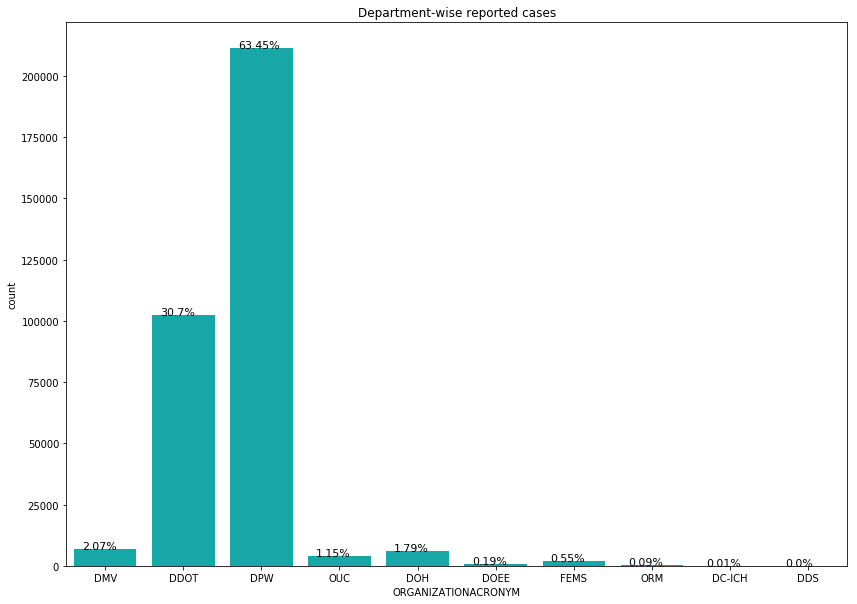

In [241]:
# let's try to visualize which Department has the most cases reported

ax = sns.countplot(x="ORGANIZATIONACRONYM", data=data_df_clean, color="c")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+ 0.1, i.get_height()+100, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11, color='black',
                )
   
plt.title("Department-wise reported cases")
plt.savefig("Department-wise reported cases")

In [12]:
data_df_clean

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,Difference_time
0,-76.970417,38.864444,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,1,2018-01-03 10:14:32+00:00,2018-01-03 10:18:35+00:00,...,2546 NAYLOR ROAD SE,402567.660000,132957.830000,38.864436,-76.970414,20020.0,301454.0,7.0,NaN,0 days 00:04:03
1,-77.021908,38.881287,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,1,2018-01-03 09:40:35+00:00,2018-02-22 08:33:38+00:00,...,NaN,398099.299996,134827.418747,38.881280,-77.021906,20024.0,903906.0,6.0,Traffic signal service request closed to initi...,49 days 22:53:03
2,-77.018693,38.930343,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:17:13+00:00,2018-01-16 15:18:05+00:00,...,426 KENYON STREET NW,398379.390000,140272.930000,38.930336,-77.018691,20010.0,229343.0,1.0,Closed after ten days no payment received,13 days 05:00:52
3,-77.003177,38.903739,307867,SRC02,Snow/Ice Removal,SNOW,DPW,1,2018-01-03 10:00:39+00:00,2018-01-08 15:34:03+00:00,...,200 - 219 BLOCK OF L STREET NE,399724.610000,137319.480000,38.903731,-77.003175,20002.0,809549.0,6.0,NaN,5 days 05:33:24
4,-76.921593,38.901643,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:16:53+00:00,2018-01-12 07:28:01+00:00,...,5528 HUNT PLACE NE,406801.370000,137089.690000,38.901635,-76.921591,20019.0,7877.0,7.0,sb - Collected – Close SR,8 days 21:11:08
5,-77.033647,38.897837,307869,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:54:24+00:00,2018-01-24 21:12:20+00:00,...,600 - 699 BLOCK OF 15TH STREET NW,397081.450000,136664.920003,38.897830,-77.033645,20005.0,803528.0,2.0,DDOT%e2%80%99s Parking and Ground Transportati...,21 days 11:17:56
6,-76.926858,38.901518,307870,SRC02,Snow/Ice Removal,SNOW,DPW,1,2018-01-03 10:18:37+00:00,2018-01-17 02:28:05+00:00,...,854 51ST STREET NE,406344.700000,137075.450000,38.901510,-76.926856,20019.0,81484.0,7.0,NaN,13 days 16:09:28
7,-76.990938,38.892975,307871,S0000,Abandoned Vehicle - On Public Property,PEMA- Parking Enforcement Management Administr...,DPW,1,2018-01-03 10:19:54+00:00,2018-01-08 09:47:36+00:00,...,1116 PARK STREET NE,400786.350000,136124.630000,38.892967,-76.990936,20002.0,73907.0,6.0,1/4/18 NOTHING WAS FOUND WITH RESPECT TO THE V...,4 days 23:27:42
8,-77.084318,38.959047,307872,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:52:40+00:00,2018-01-11 09:18:29+00:00,...,4300 - 4349 BLOCK OF JENIFER STREET NW,392692.150000,143462.500003,38.959039,-77.084316,20015.0,808524.0,3.0,DDOT%e2%80%99s Parking and Ground Transportati...,7 days 23:25:49
9,-76.991614,38.905054,307873,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:14:49+00:00,2018-01-10 07:58:16+00:00,...,1213 WEST VIRGINIA AVENUE NE,400727.620000,137465.560000,38.905047,-76.991611,20002.0,71600.0,5.0,am - Not Found – Close SR,6 days 21:43:27


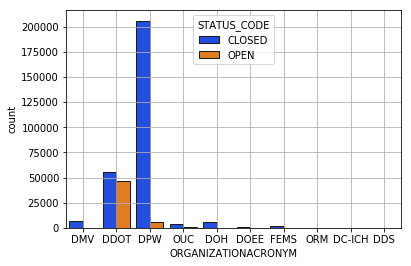

In [13]:
p = sns.countplot(x='ORGANIZATIONACRONYM',data=data_df_clean, hue="STATUS_CODE",palette="bright",edgecolor=".1")
plt.grid(True)
plt.rcParams['figure.figsize']=(14,10)


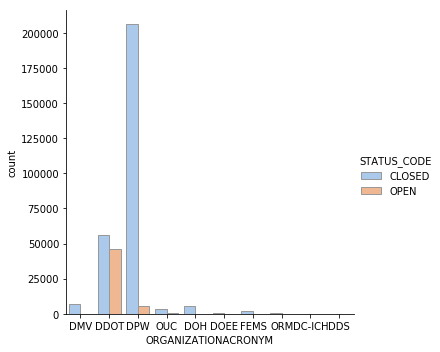

In [14]:
sns.catplot(hue="STATUS_CODE", x="ORGANIZATIONACRONYM", kind="count",
            palette="pastel", edgecolor=".6",
            data=data_df_clean)

# Ward-wise cases reported 

In [ ]:
'#393AD5', '#0F9CFB', '#4CFCB4', '#BDFA42','#FEB80F','#F93601','#7E040E'

Text(0.5, 1.0, 'Ward-wise % cases-reported')

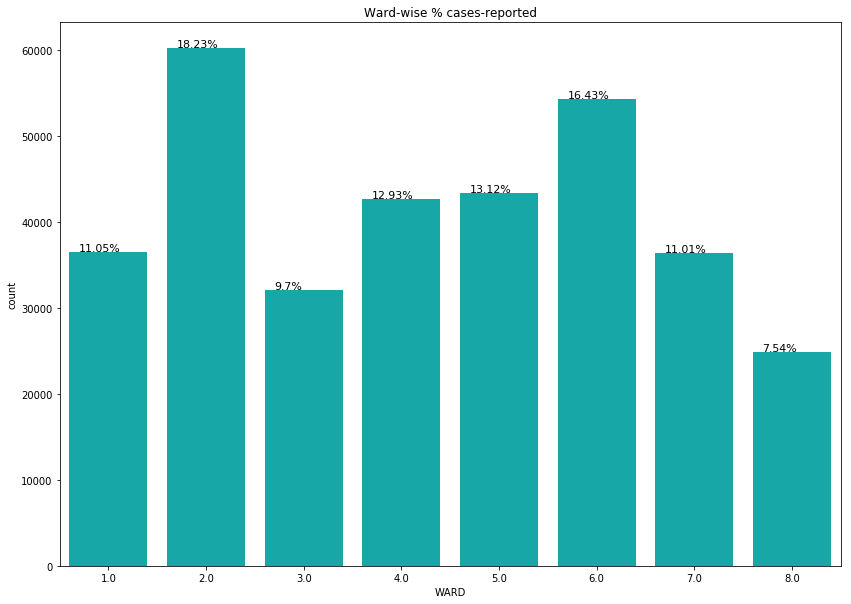

In [240]:

 
ax = sns.countplot(x="WARD", data=data_df_clean,color="c")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+ 0.1, i.get_height()+100, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11, color='black',
                )

plt.title("Ward-wise % cases-reported")

In [16]:
#looks like wards has the maximum number of cases reported, So, let's try to visualize the distribution report cases


# Department-wise cases reported

### Ward 3

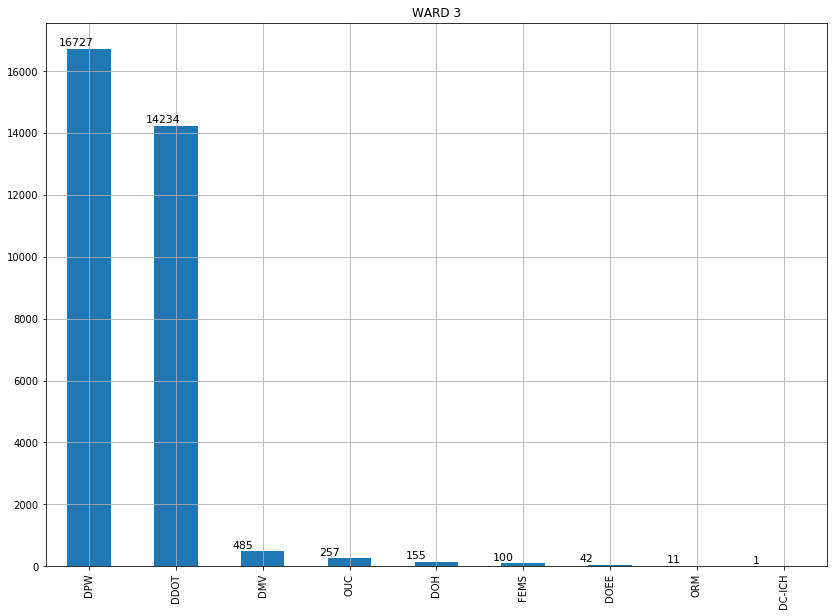

In [17]:
ax  = data_df_clean[data_df_clean["WARD"]== 3.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 3")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()- 0.1, i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)

### Ward 2

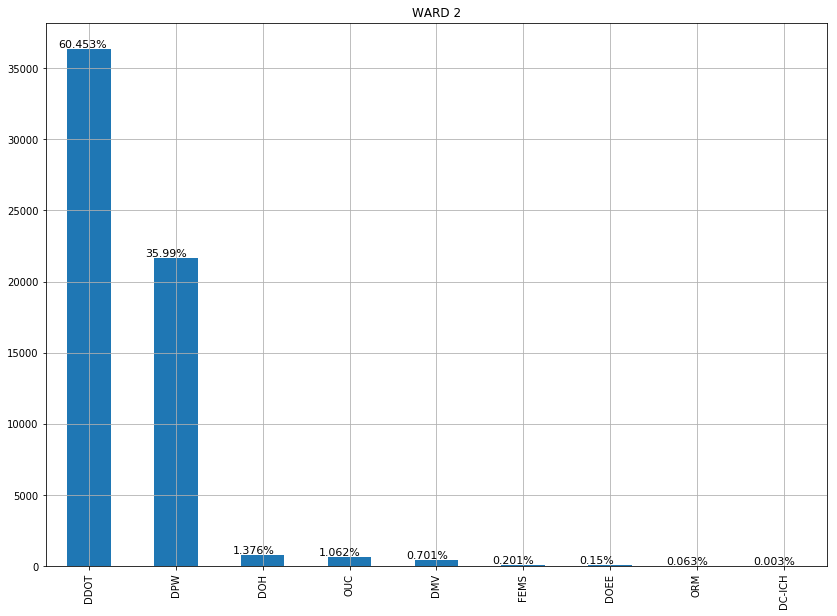

In [247]:
ax = data_df_clean[data_df_clean["WARD"]== 2.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 2")

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()- 0.1, i.get_height()+100, \
            str(round((i.get_height()/total)*100, 3))+"%", fontsize=11, color='black',
                )
    
plt.grid(True)

### Ward 4

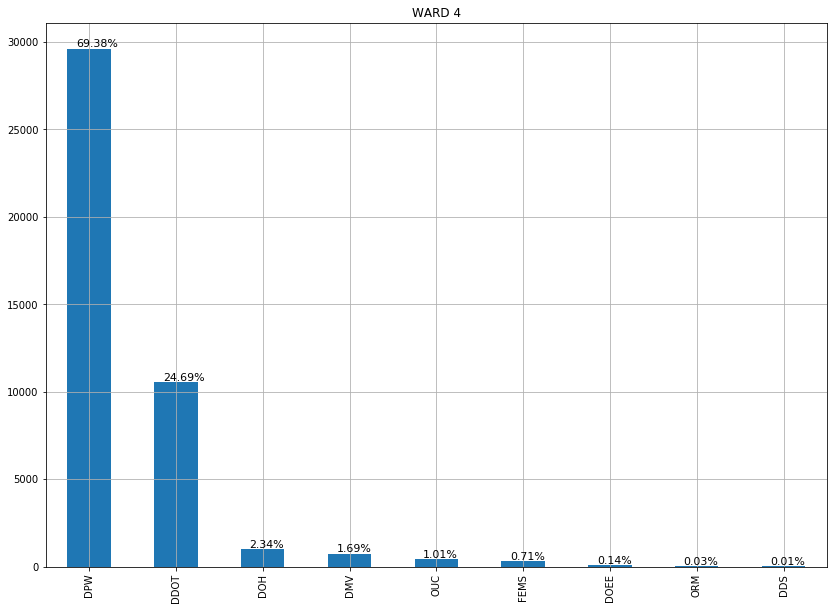

In [19]:
ax = data_df_clean[data_df_clean["WARD"]== 4.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 4")

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+ 0.1, i.get_height()+100, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11, color='black',
                )
    
plt.grid(True)

In [20]:
data_df_clean[(data_df_clean['WARD']==4.0)]["PRIORITY"].value_counts()

STANDARD    42674
URGENT          3
Name: PRIORITY, dtype: int64

### Ward 5

In [21]:
data_df_clean[(data_df_clean['WARD']==5.0) ]["PRIORITY"].value_counts()

STANDARD     43294
URGENT           3
EMERGENCY        1
Name: PRIORITY, dtype: int64

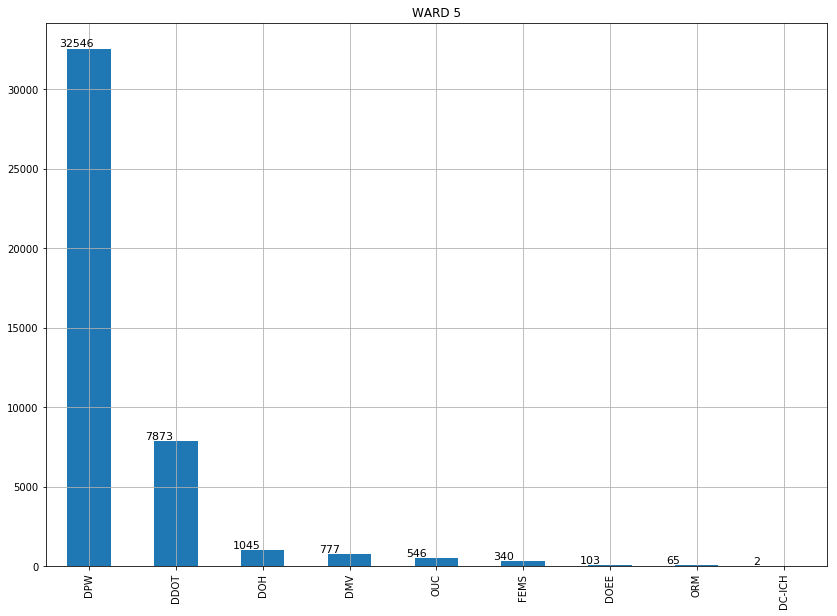

In [22]:
ax = data_df_clean[data_df_clean["WARD"]== 5.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 5")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()- 0.1, i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)

### Ward 6

In [23]:
data_df_clean[(data_df_clean['WARD']==6.0)]["PRIORITY"].value_counts()

STANDARD    54212
URGENT          9
Name: PRIORITY, dtype: int64

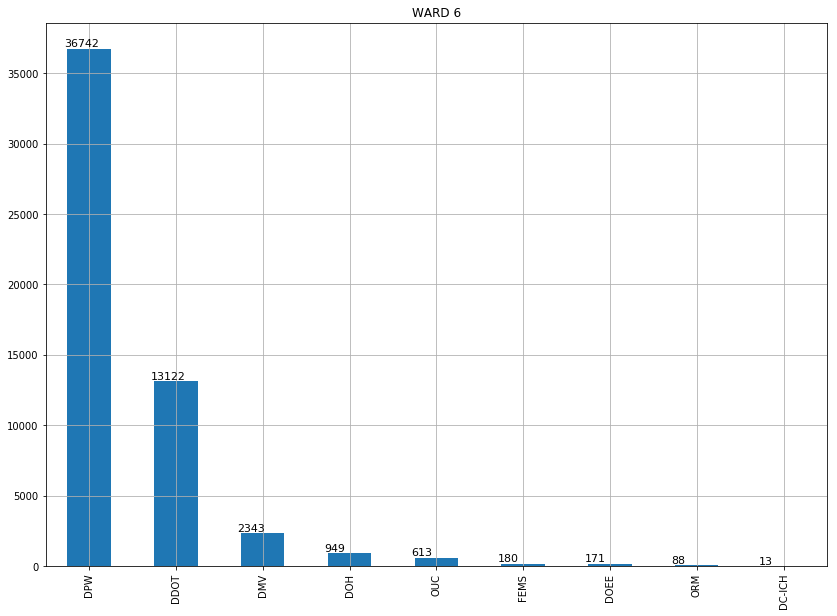

In [24]:
ax = data_df_clean[data_df_clean["WARD"]== 6.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 6")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.04, i.get_height()+135, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)

### Ward 7

In [25]:
data_df_clean[(data_df_clean['WARD']==7.0)]["PRIORITY"].value_counts()

STANDARD    36354
URGENT          2
Name: PRIORITY, dtype: int64

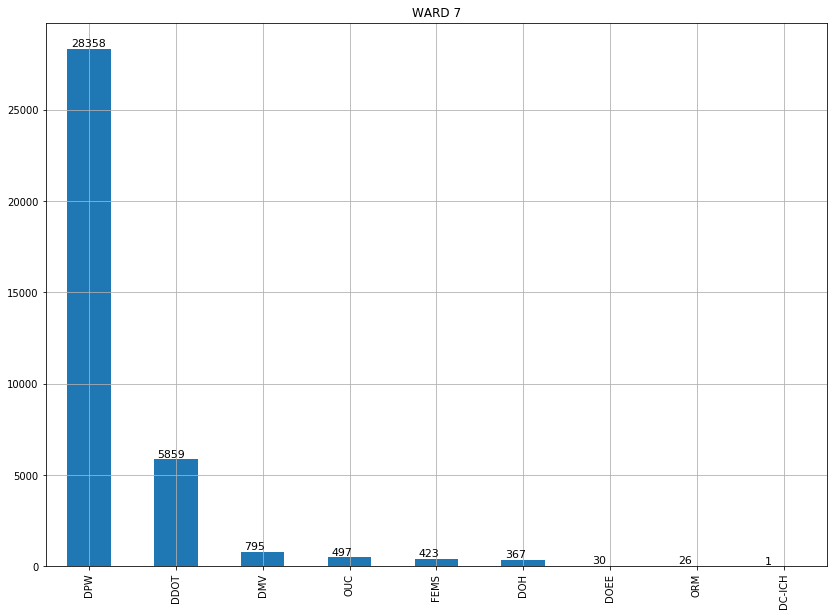

In [26]:
ax = data_df_clean[data_df_clean["WARD"]== 7.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 7")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)

### Ward 1

In [27]:
data_df_clean[(data_df_clean['WARD']==1.0) ]["PRIORITY"].value_counts()

STANDARD    36458
URGENT          2
Name: PRIORITY, dtype: int64

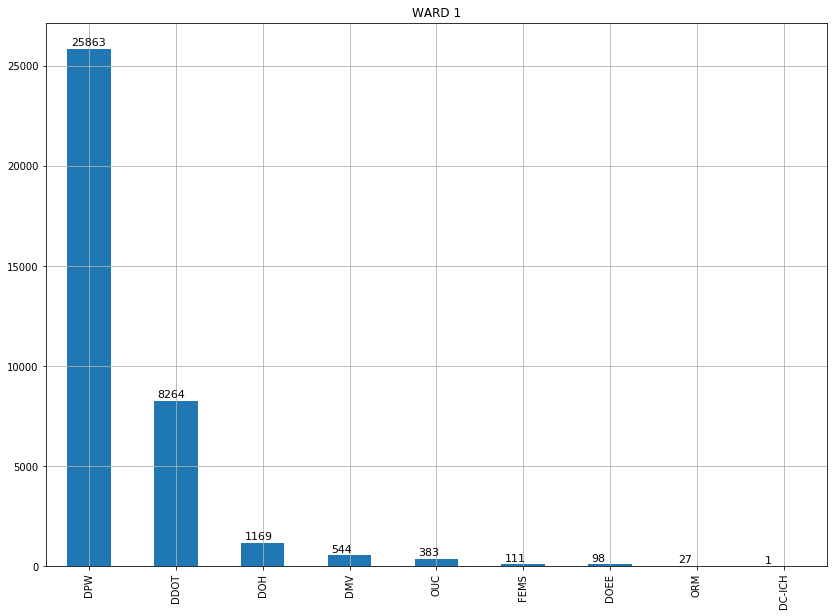

In [28]:

ax = data_df_clean[data_df_clean["WARD"]== 1.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 1")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+150, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)

### Ward 8

In [29]:
data_df_clean[(data_df_clean['WARD']==8.0) ]["PRIORITY"].value_counts()

STANDARD    24873
URGENT          2
Name: PRIORITY, dtype: int64

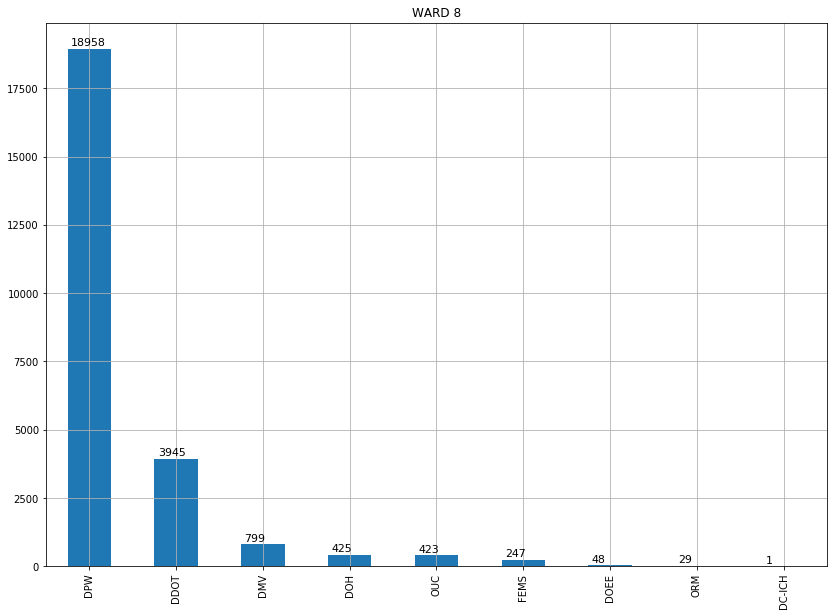

In [30]:
ax = data_df_clean[data_df_clean["WARD"]== 8.0]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title = "WARD 8")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+100, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)


In [31]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 28 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

# Priority Based Analysis

## Priority -> Standard

In [32]:
data_df_clean[data_df_clean["PRIORITY"]=="STANDARD"]["ORGANIZATIONACRONYM"].value_counts()

DPW       211362
DDOT      102256
DMV         6871
DOH         5947
OUC         3824
FEMS        1828
DOEE         643
ORM          315
DC-ICH        21
DDS            4
Name: ORGANIZATIONACRONYM, dtype: int64

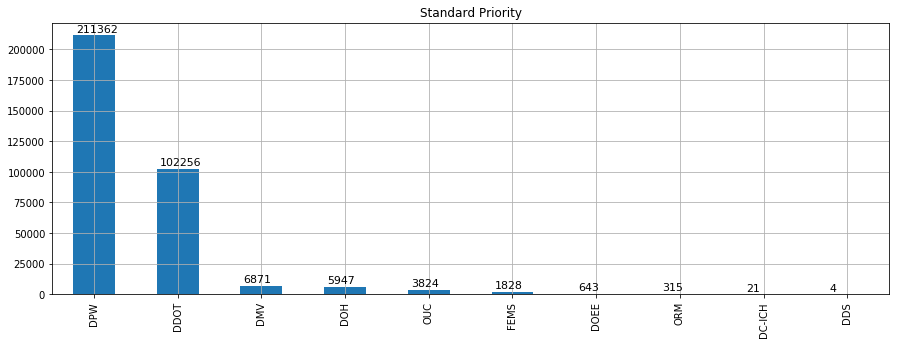

In [33]:
ax = data_df_clean[data_df_clean["PRIORITY"]=="STANDARD"]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title="Standard Priority", figsize=(15,5))

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+2800, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                )
    
plt.grid(True)

### DDS

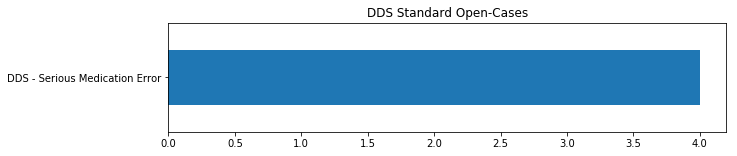

In [34]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DDS") & (data_df_clean["STATUS_CODE"] == "OPEN")]["SERVICECODEDESCRIPTION"].value_counts().plot.barh(figsize = (10,2), title = "DDS Standard Open-Cases")
plt.xlabel = "count"

### DC-ICH

TypeError: 'str' object is not callable

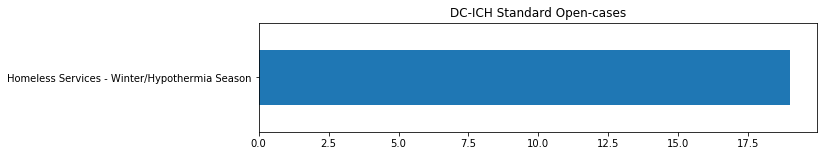

In [35]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DC-ICH") & (data_df_clean["STATUS_CODE"] == "OPEN")]["SERVICECODEDESCRIPTION"].value_counts().plot.barh(figsize = (10,2), title = "DC-ICH Standard Open-cases")
plt.xlabel("Count")

### ORM

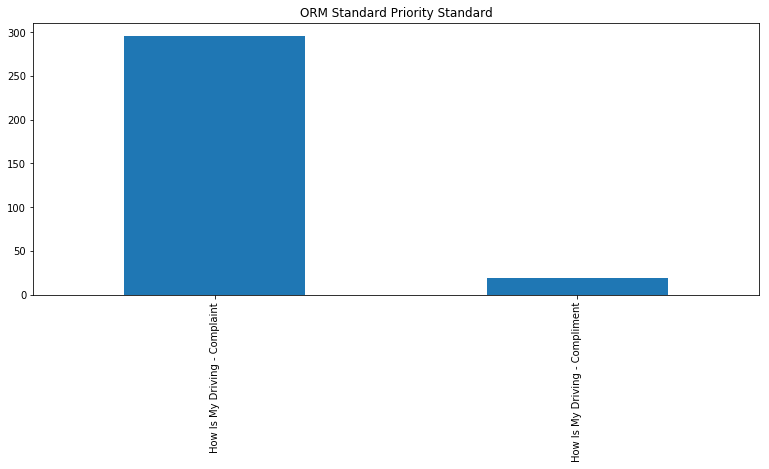

In [36]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "ORM") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.bar(figsize = (13,5), title = "ORM Standard Priority Standard")

### DOEE

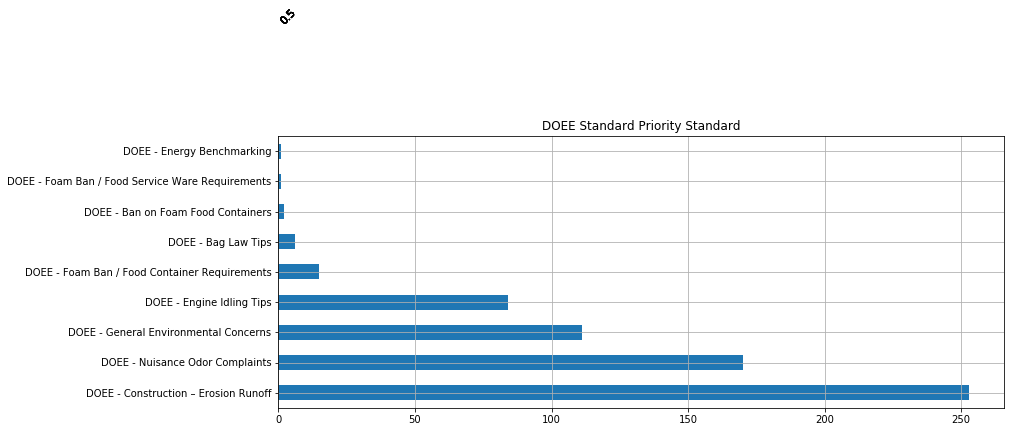

In [37]:
ax = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DOEE") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.barh(figsize = (13,5), title = "DOEE Standard Priority Standard")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+12, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=45)
    
plt.grid(True)


### FEMS

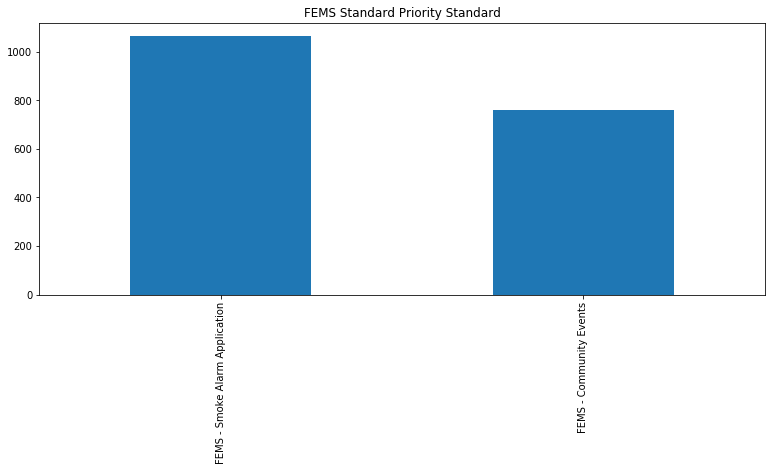

In [38]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "FEMS") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.bar(figsize = (13,5), title = "FEMS Standard Priority Standard")

### OUC

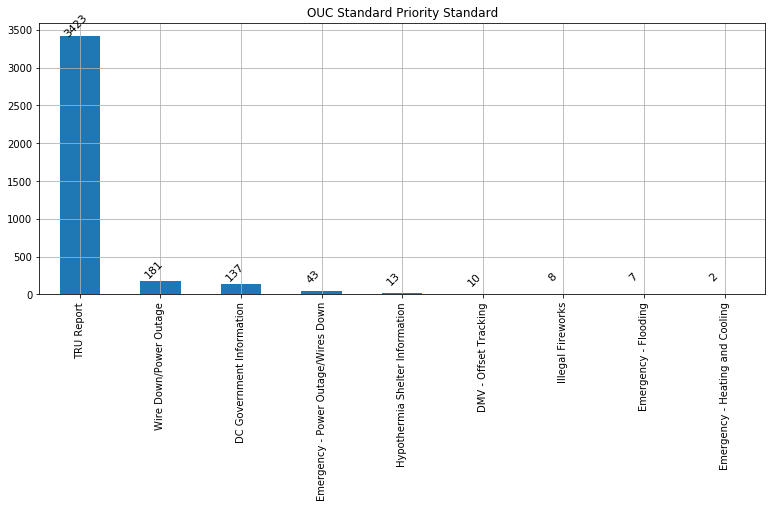

In [39]:
ax = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "OUC") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.bar(figsize = (13,5), title = "OUC Standard Priority Standard")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+200, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=45)
    
plt.grid(True)

### DOH

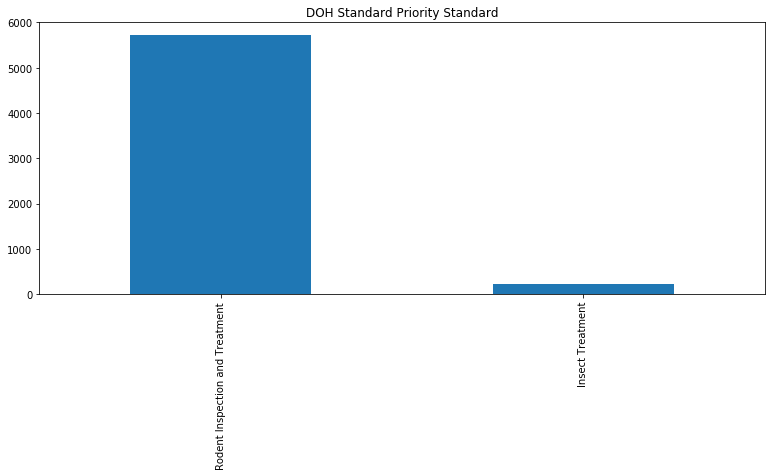

In [40]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DOH") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.bar(figsize = (13,5), title = "DOH Standard Priority Standard")

### DDOT

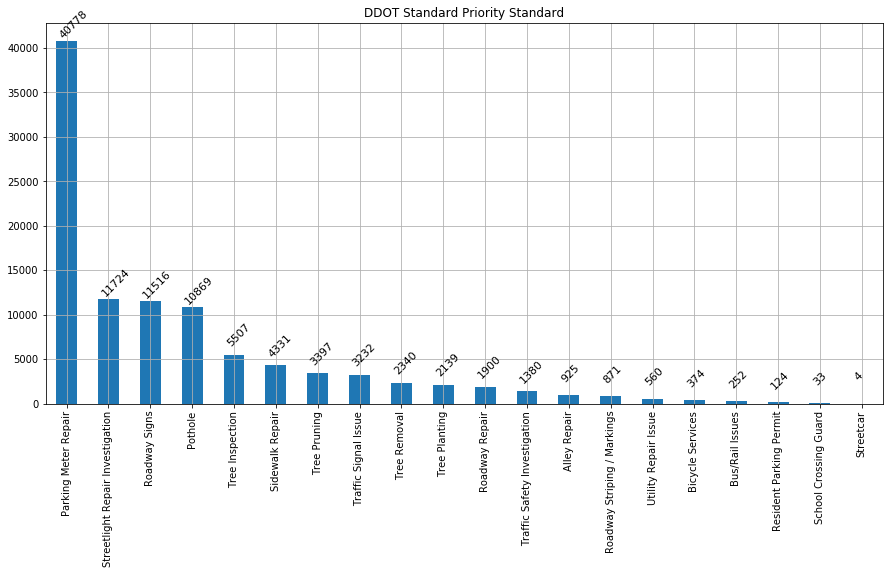

In [41]:
ax = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DDOT") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.bar(figsize = (15,7), title = "DDOT Standard Priority Standard")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+2800, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=45)
    
plt.grid(True)

### DPW

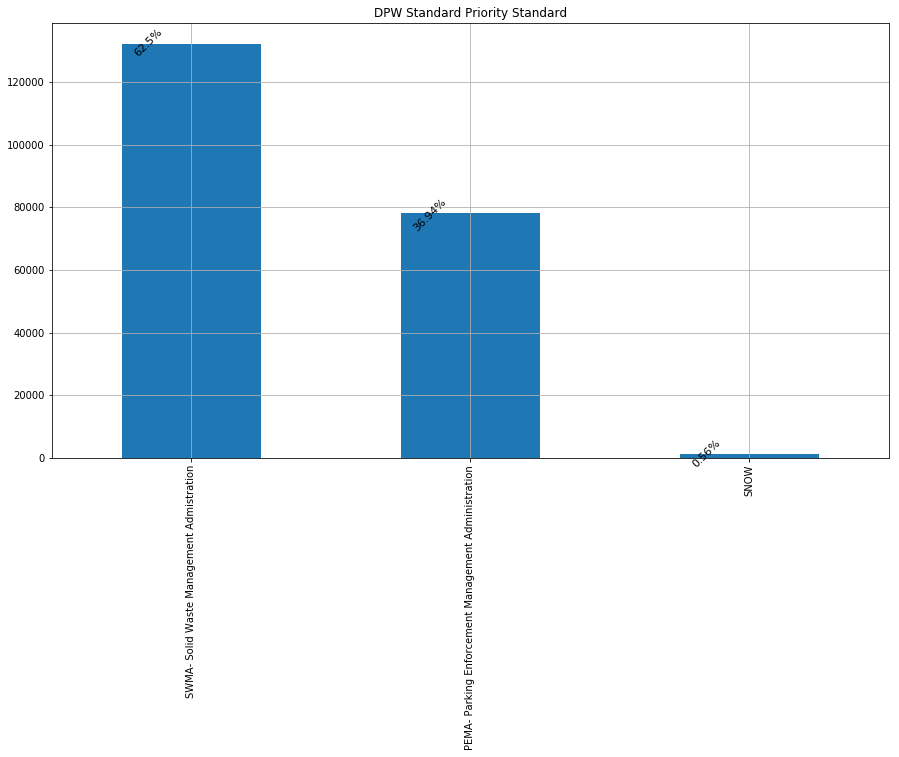

In [42]:
ax = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DPW") ]["SERVICETYPECODEDESCRIPTION"].value_counts().plot.bar(figsize=(15,8),title = "DPW Standard Priority Standard")


totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+2800, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11, color='black',
             rotation=45  )
    
plt.grid(True)

### DMV

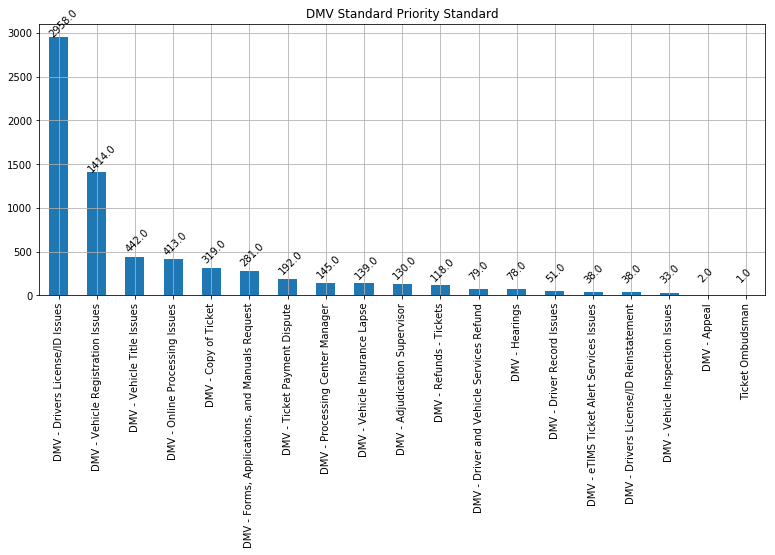

In [43]:
#http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
ax = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DMV") & (data_df_clean["PRIORITY"] == "STANDARD")]["SERVICECODEDESCRIPTION"].value_counts().plot.bar(figsize=(13,5),title = "DMV Standard Priority Standard")

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+250, \
            str(round((i.get_height()/1), 2)), fontsize=10,
                color='black', rotation=45)


plt.grid(True)


## Priority -> Urgent

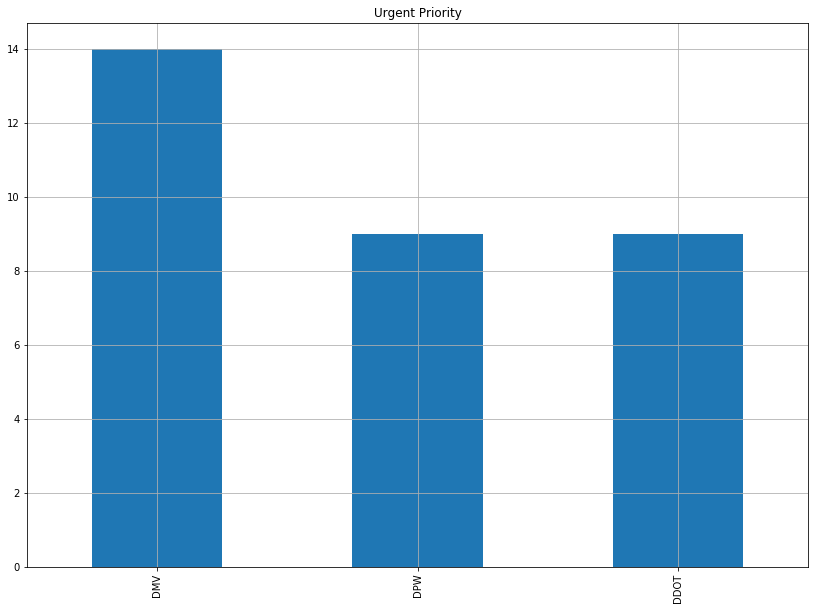

In [44]:
data_df_clean[data_df_clean["PRIORITY"]=="URGENT"]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title="Urgent Priority")
plt.grid(True)

### DDOT

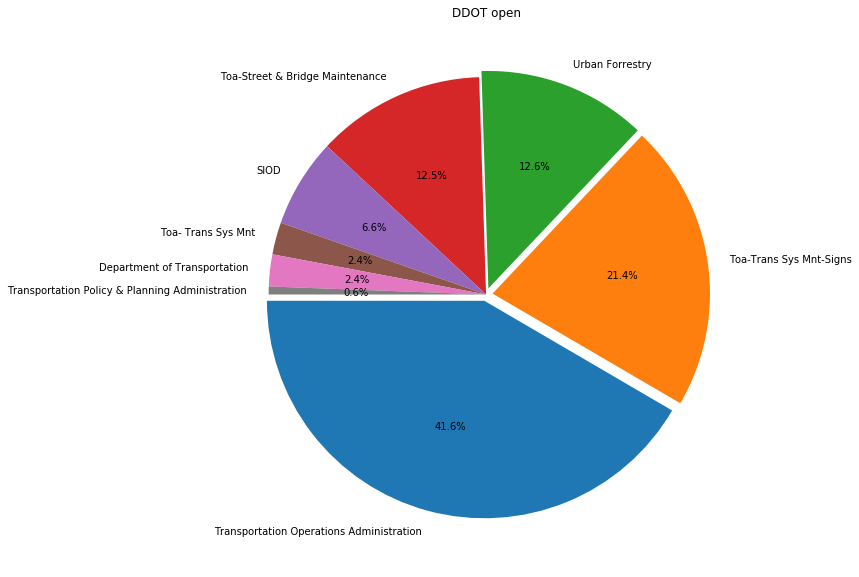

In [45]:
explode = (0.03, 0.03, 0.03, 0,0,0,0,0)
ldf = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DDOT") & (data_df_clean["STATUS_CODE"] == "OPEN") ]["SERVICETYPECODEDESCRIPTION"]
ldf = ldf.rename("")
ldf.value_counts().plot.pie(autopct='%1.1f%%',title = "DDOT open",explode=explode,startangle=180)

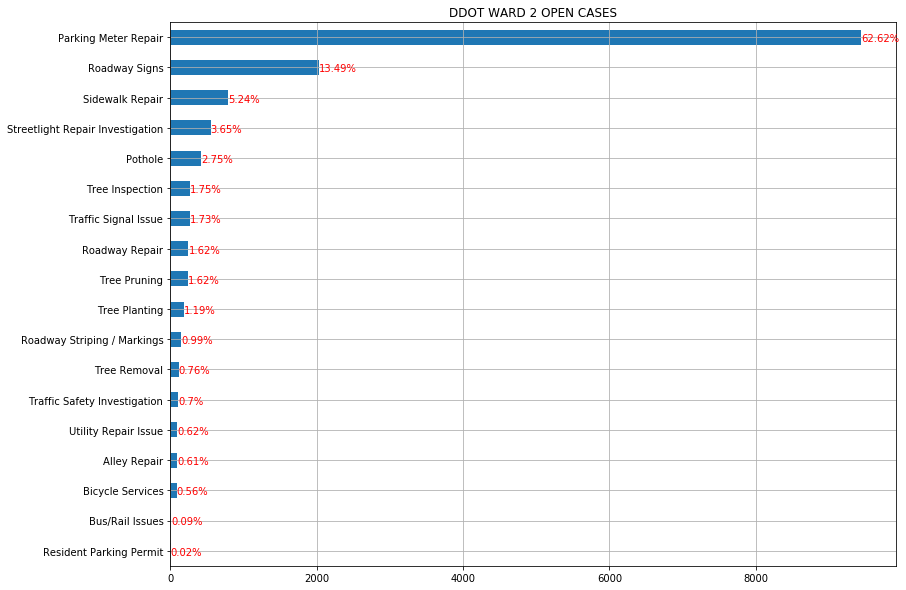

In [46]:
#http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
ax = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DDOT") & (data_df_clean["STATUS_CODE"]=="OPEN") & (data_df_clean["WARD"] == 2)]["SERVICECODEDESCRIPTION"].value_counts().plot.barh(figsize=(13,10),title = "DDOT WARD 2 OPEN CASES")

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.25, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=10,
color='red')


plt.grid(True)

ax.invert_yaxis()


### DPW

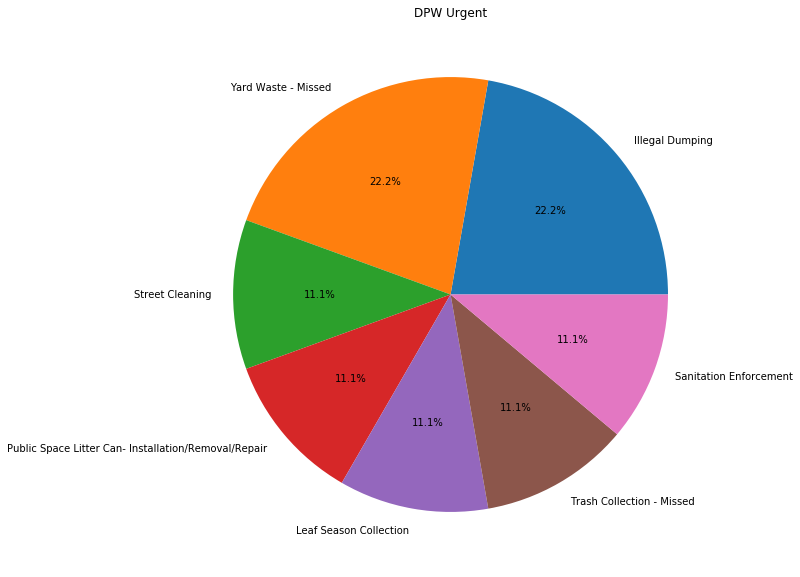

In [47]:
ldf = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  =="DPW") & (data_df_clean["PRIORITY"] =="URGENT")]["SERVICECODEDESCRIPTION"]
ldf = ldf.rename("")

ldf.value_counts().plot.pie(autopct='%1.1f%%',title = "DPW Urgent")

### DMV

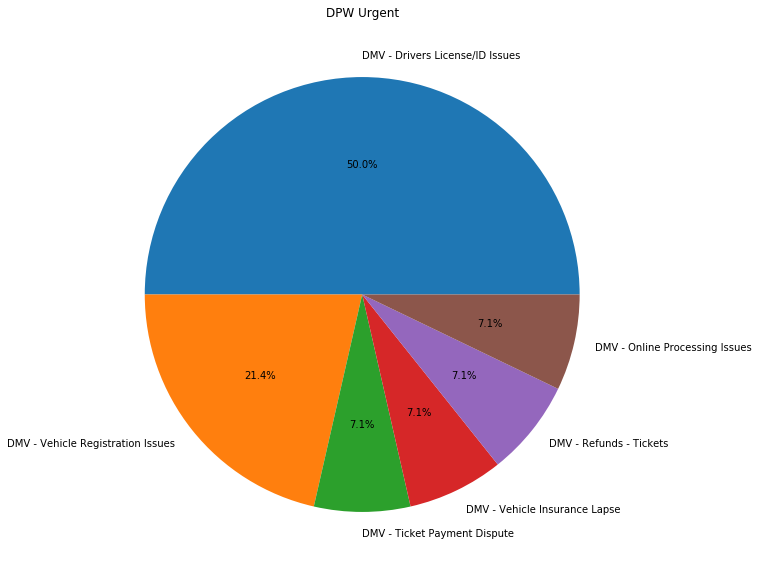

In [48]:
ldf = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DMV") & (data_df_clean["PRIORITY"] == "URGENT")]["SERVICECODEDESCRIPTION"]
ldf = ldf.rename("")
ldf.value_counts().plot.pie(autopct='%1.1f%%',title = "DPW Urgent",)

## Priority -> Emergency

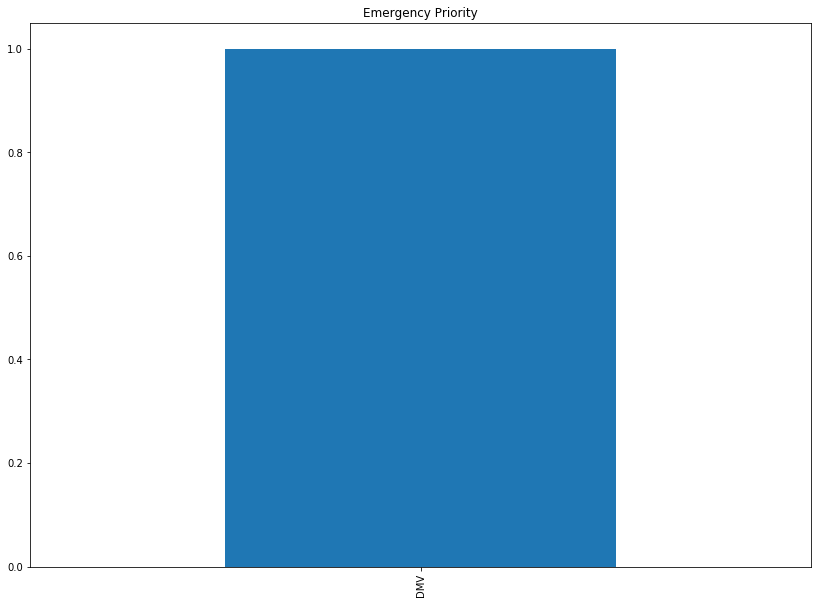

In [49]:
data_df_clean[data_df_clean["PRIORITY"]=="EMERGENCY"]["ORGANIZATIONACRONYM"].value_counts().plot.bar(title="Emergency Priority")

In [50]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]  == "DMV") & (data_df_clean["PRIORITY"] == "EMERGENCY")]["SERVICECODEDESCRIPTION"]

171603    DMV - Vehicle Registration Issues
Name: SERVICECODEDESCRIPTION, dtype: object

In [51]:
# So, here we observe that DPW, DDOT have the most number of cases reported but we cannot ignore others so,
# we'll definitely have a look at the as well

In [52]:
# let's visualize the cases for DPW
A = data_df_clean[data_df_clean['ORGANIZATIONACRONYM']=="DPW"]["SERVICECODEDESCRIPTION"].value_counts()
A_DPW = A[:13]
A_DPW_other = A[13:]
A_DPW['other'] =sum(A[13:])

A_DPW_other
A_DPW

Bulk Collection                           54895
Parking Enforcement                       40929
Emergency No-Parking Verification         16793
Sanitation Enforcement                    11877
Trash Collection - Missed                 11555
Residential Parking Permit Violation       9589
Illegal Dumping                            7959
Abandoned Vehicle - On Public Property     5917
Recycling Collection - Missed              5813
Alley Cleaning                             5792
Graffiti Removal                           5310
Street Cleaning                            4268
Out of State Parking Violation (ROSA)      3784
other                                     26890
Name: SERVICECODEDESCRIPTION, dtype: int64

(-1.1882707861615145,
 1.2092353809038676,
 -1.2123189334080802,
 1.201854326744658)

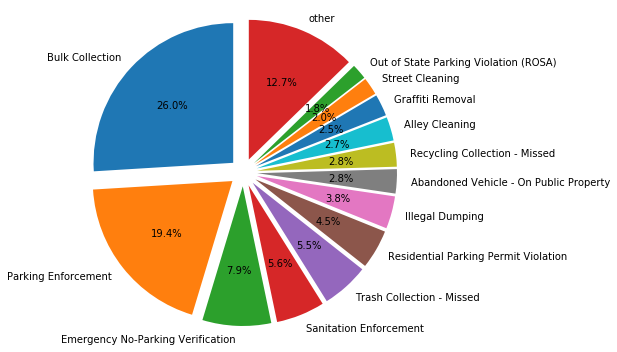

In [53]:
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ldf = A_DPW
ldf = ldf.rename("")
ldf.plot.pie(figsize=(6,6),explode=explode,y= data_df_clean.index,shadow=False,startangle=90,autopct='%1.1f%%')
plt.tight_layout
plt.axis('equal')

In [54]:
data_df_clean.head(5)

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,Difference_time
0,-76.970417,38.864444,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,1,2018-01-03 10:14:32+00:00,2018-01-03 10:18:35+00:00,...,2546 NAYLOR ROAD SE,402567.660000,132957.830000,38.864436,-76.970414,20020.0,301454.0,7.0,NaN,0 days 00:04:03
1,-77.021908,38.881287,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,1,2018-01-03 09:40:35+00:00,2018-02-22 08:33:38+00:00,...,NaN,398099.299996,134827.418747,38.881280,-77.021906,20024.0,903906.0,6.0,Traffic signal service request closed to initi...,49 days 22:53:03
2,-77.018693,38.930343,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:17:13+00:00,2018-01-16 15:18:05+00:00,...,426 KENYON STREET NW,398379.390000,140272.930000,38.930336,-77.018691,20010.0,229343.0,1.0,Closed after ten days no payment received,13 days 05:00:52
3,-77.003177,38.903739,307867,SRC02,Snow/Ice Removal,SNOW,DPW,1,2018-01-03 10:00:39+00:00,2018-01-08 15:34:03+00:00,...,200 - 219 BLOCK OF L STREET NE,399724.610000,137319.480000,38.903731,-77.003175,20002.0,809549.0,6.0,NaN,5 days 05:33:24
4,-76.921593,38.901643,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:16:53+00:00,2018-01-12 07:28:01+00:00,...,5528 HUNT PLACE NE,406801.370000,137089.690000,38.901635,-76.921591,20019.0,7877.0,7.0,sb - Collected – Close SR,8 days 21:11:08


In [55]:
# from the above Pie Plot we observe that most of the reported cases in DPW are coming from "Bulk Collection"
# "Parking enforcements" and "Emergency No-Parking Verification"
# so, let's try to visualize them and see if we can say something about the data


In [56]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 28 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

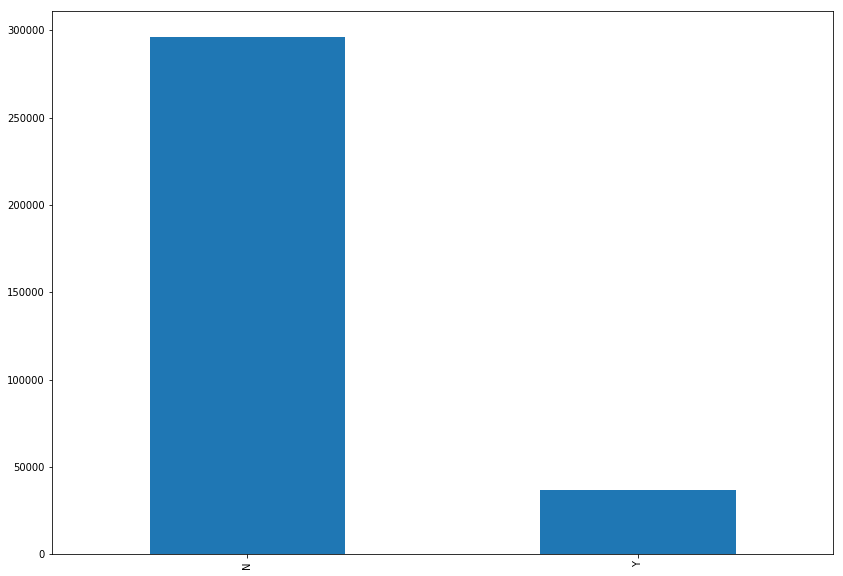

In [57]:
data_df_clean['INSPECTIONFLAG'].value_counts().plot.bar()

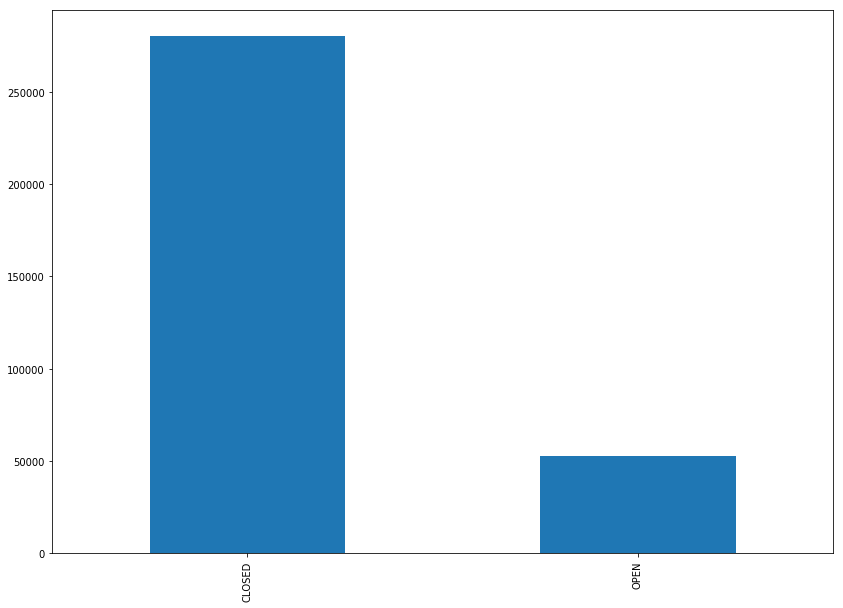

In [58]:
data_df_clean['STATUS_CODE'].value_counts().plot.bar()

In [59]:
# Bulk collection df
data_df_clean_BlkCol = data_df_clean[data_df_clean["SERVICECODEDESCRIPTION"]== "Bulk Collection"]

Text(0.5, 1.0, 'Ward-wise cases-reported distribution')

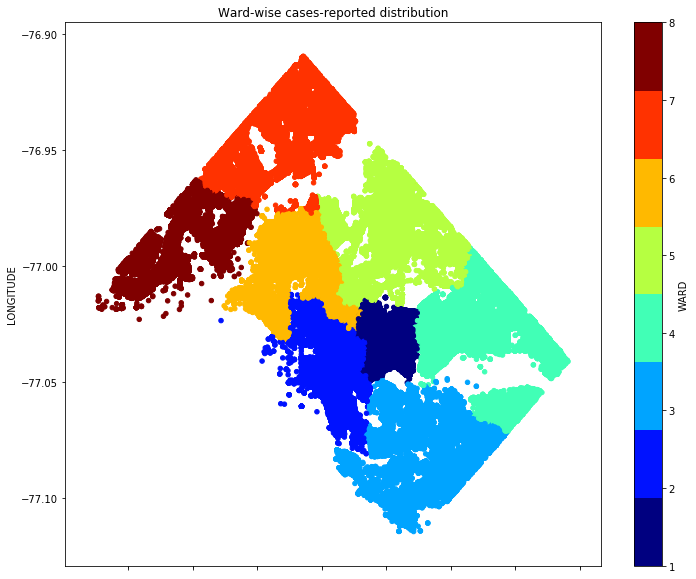

In [60]:
data_df_clean.plot(kind='scatter',x='LATITUDE',y='LONGITUDE',figsize=(12,10),alpha=1,c="WARD",cmap=plt.get_cmap("jet",8))
plt.title("Ward-wise cases-reported distribution")

In [61]:
data_df_clean_BlkCol_na=data_df_clean_BlkCol[data_df_clean_BlkCol["Difference_time"].isna() == False]


In [62]:
# Parking Enforcement df
data_df_clean_PrkEnf = data_df_clean[data_df_clean["SERVICECODEDESCRIPTION"]== "Parking Enforcement"]

Text(0.5, 0.01, 'I need the caption to be present a little below X-axis')

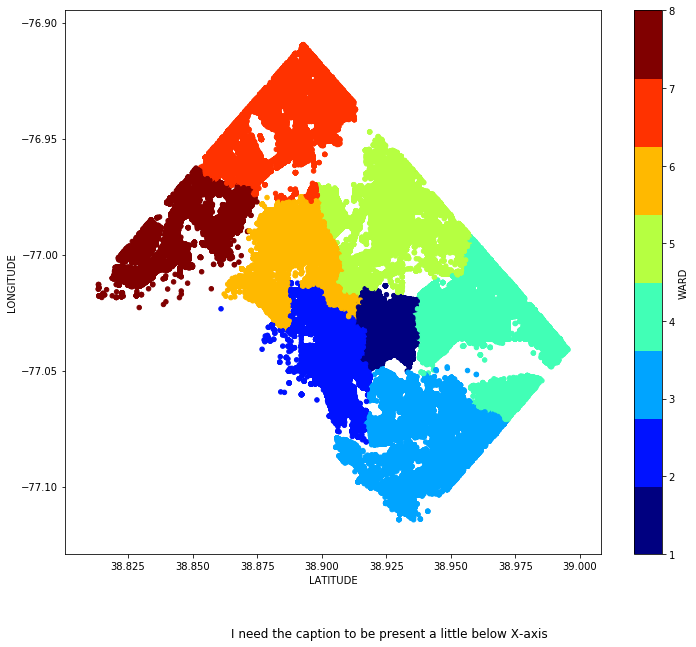

In [234]:

ax = data_df_clean.plot(kind='scatter',x='LATITUDE',y='LONGITUDE',figsize=(12,10),alpha=1,c="WARD",cmap=plt.get_cmap("jet",8),colorbar=True, sharex=False)
txt="I need the caption to be present a little below X-axis"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

In [64]:
# Parking Enforcement df
data_df_clean_NPrkVrf = data_df_clean[data_df_clean["SERVICECODEDESCRIPTION"]== "Emergency No-Parking Verification"]

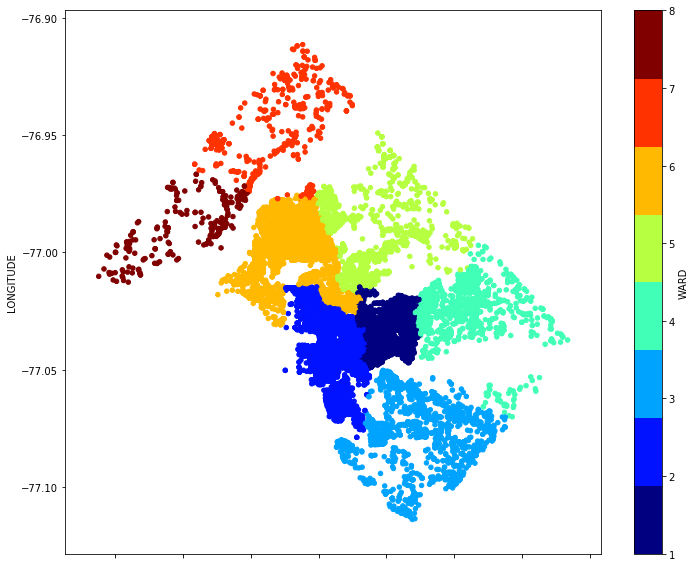

In [65]:
data_df_clean_NPrkVrf.plot(kind='scatter',x='LATITUDE',y='LONGITUDE',figsize=(12,10),alpha=1,c="WARD",cmap=plt.get_cmap("jet",8))

In [66]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 28 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

In [67]:
STAT_COUNT = (data_df.groupby(["ORGANIZATIONACRONYM"])["STATUS_CODE"].value_counts(normalize=True).rename('percentage of cases').mul(100).reset_index().sort_values("ORGANIZATIONACRONYM"))

STAT_COUNT  

,ORGANIZATIONACRONYM,STATUS_CODE,percentage of cases
0,DC-ICH,OPEN,90.476190
1,DC-ICH,CLOSED,9.523810
2,DDOT,CLOSED,54.575857
3,DDOT,OPEN,45.424143
4,DDS,OPEN,100.000000
5,DMV,CLOSED,99.941911
6,DMV,OPEN,0.058089
7,DOEE,CLOSED,71.539658
8,DOEE,OPEN,28.460342
10,DOH,OPEN,2.286867


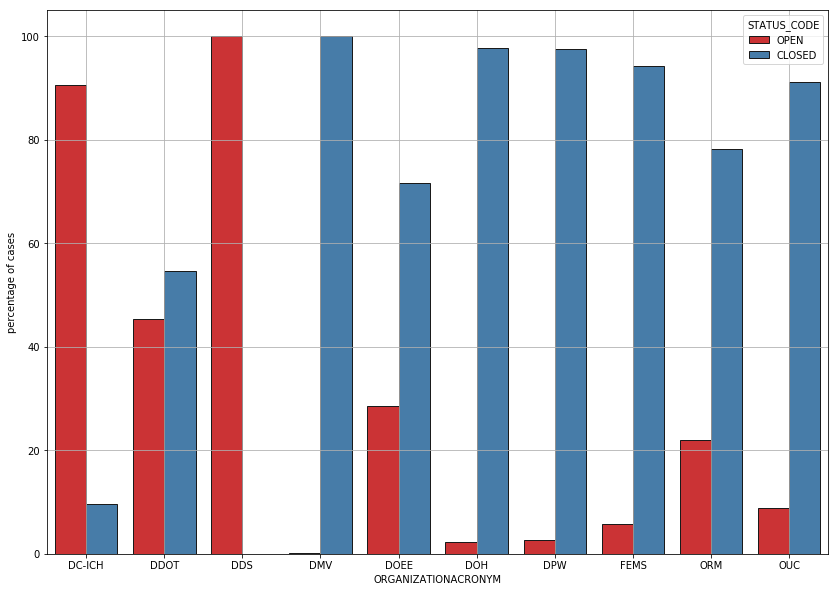

In [68]:
p = sns.barplot(x='ORGANIZATIONACRONYM',y='percentage of cases',data=STAT_COUNT, hue="STATUS_CODE",palette="Set1",edgecolor=".1")
plt.grid(True)
plt.rcParams['figure.figsize']=(14,10)

plt.savefig("Org-wise open_closed")

As you can see that a lot of cases are open in DC-ICH, DDOT and DDS there is some problem which has to be fihured out

### Analyzing the reason for open cases

#### DC-ICH

In [69]:
data_df_clean_ICH_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DC-ICH") & (data_df_clean["STATUS_CODE"] == "OPEN")]

In [70]:
data_df_clean_ICH_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 2421 to 117760
Data columns (total 28 columns):
X                             19 non-null float64
Y                             19 non-null float64
OBJECTID                      19 non-null int64
SERVICECODE                   19 non-null object
SERVICECODEDESCRIPTION        19 non-null object
SERVICETYPECODEDESCRIPTION    19 non-null object
ORGANIZATIONACRONYM           19 non-null object
SERVICECALLCOUNT              19 non-null int64
ADDDATE                       19 non-null datetime64[ns, UTC]
RESOLUTIONDATE                0 non-null datetime64[ns, UTC]
SERVICEDUEDATE                19 non-null datetime64[ns, UTC]
SERVICEORDERDATE              19 non-null datetime64[ns, UTC]
INSPECTIONFLAG                19 non-null object
INSPECTIONDATE                0 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            19 non-null object
STATUS_CODE                   19 non-null object
SERVICEREQUESTID              19 non-null o

So, most of the open cases are for homelessness

In [71]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DC-ICH") & (data_df_clean["STATUS_CODE"] == "OPEN")]["SERVICECODEDESCRIPTION"].value_counts()

Homeless Services - Winter/Hypothermia Season    19
Name: SERVICECODEDESCRIPTION, dtype: int64

TypeError: 'str' object is not callable

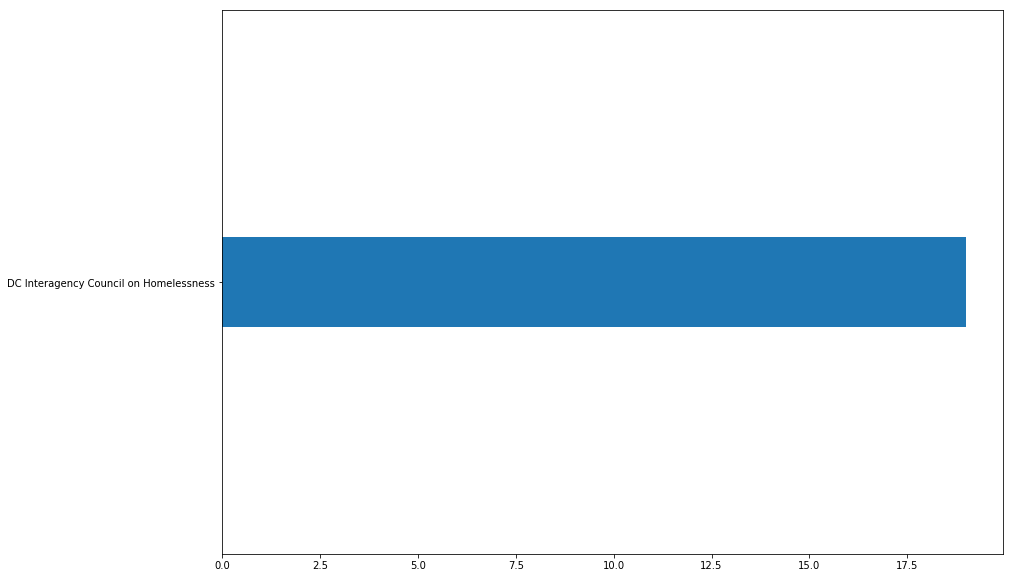

In [72]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DC-ICH") & (data_df_clean["STATUS_CODE"] == "OPEN")]["SERVICETYPECODEDESCRIPTION"].value_counts().plot.barh(width=0.1)
plt.xlabel("SERVICE TYPE DESCRIPTION")

plt.title("Homeless Services - Winter/Hypothermia Season SERVICE TYPE DESCRIPTION open cases")

TypeError: 'str' object is not callable

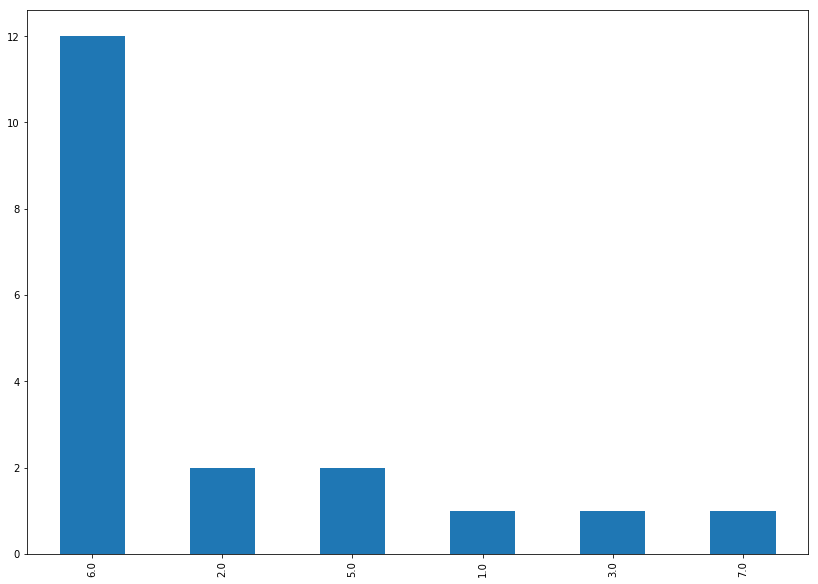

In [73]:
data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DC-ICH") & (data_df_clean["STATUS_CODE"] == "OPEN")]["WARD"].value_counts().plot.bar()
plt.xlabel("WARDS")
plt.ylabel("# of Open cases")
plt.title("Homeless Services - Winter/Hypothermia Season ward-wise open cases")

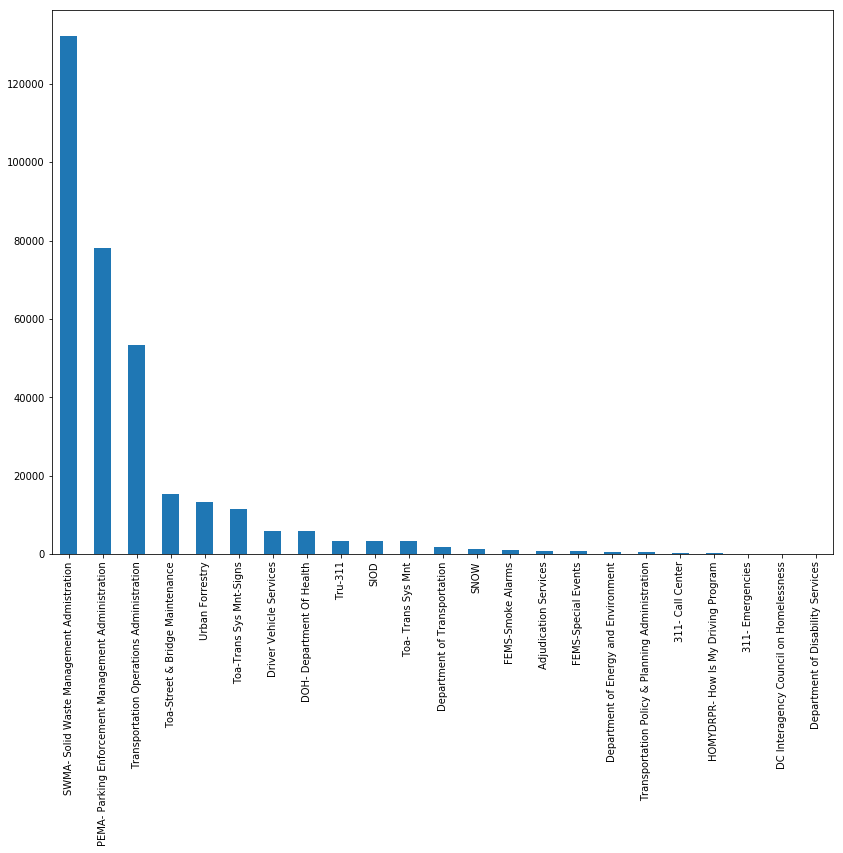

In [74]:
data_df_clean["SERVICETYPECODEDESCRIPTION"].value_counts().plot.bar()

#### DDOT

In [75]:
data_df_clean_DDOT_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DDOT") & (data_df_clean["STATUS_CODE"] == "OPEN")]

In [76]:
data_df_clean_DDOT_open.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46453 entries, 53 to 333100
Data columns (total 28 columns):
X                             46453 non-null float64
Y                             46453 non-null float64
OBJECTID                      46453 non-null int64
SERVICECODE                   46453 non-null object
SERVICECODEDESCRIPTION        46453 non-null object
SERVICETYPECODEDESCRIPTION    46453 non-null object
ORGANIZATIONACRONYM           46453 non-null object
SERVICECALLCOUNT              46453 non-null int64
ADDDATE                       46453 non-null datetime64[ns, UTC]
RESOLUTIONDATE                0 non-null datetime64[ns, UTC]
SERVICEDUEDATE                46453 non-null datetime64[ns, UTC]
SERVICEORDERDATE              46453 non-null datetime64[ns, UTC]
INSPECTIONFLAG                46453 non-null object
INSPECTIONDATE                1 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            46453 non-null object
STATUS_CODE                   46453 non-null object


TypeError: 'str' object is not callable

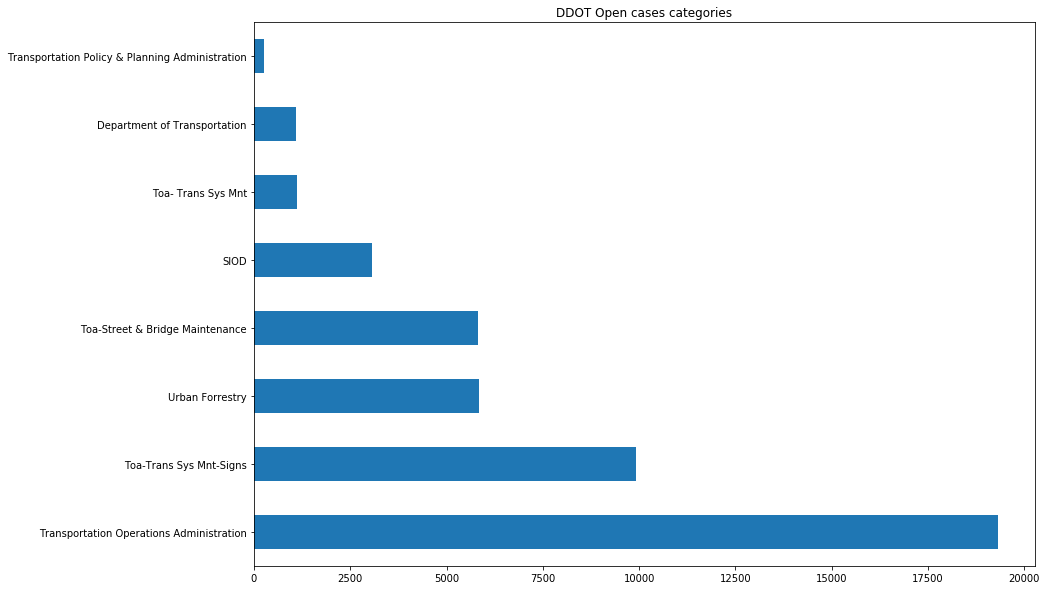

In [77]:
data_df_clean_DDOT_open["SERVICETYPECODEDESCRIPTION"].value_counts().plot.barh(sharex=False)
plt.title("DDOT Open cases categories")
plt.xlabel("Count")
plt.savefig("DDOT_open cat.png",bbox_inches = 'tight')

TypeError: 'str' object is not callable

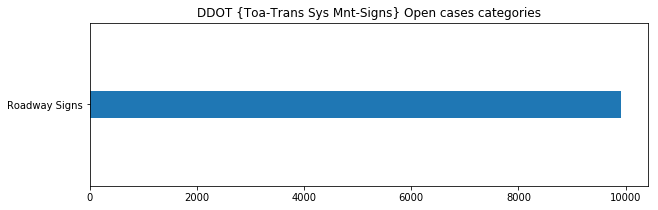

In [242]:
data_df_clean_DDOT_open[data_df_clean_DDOT_open["SERVICETYPECODEDESCRIPTION"]== "Toa-Trans Sys Mnt-Signs"]['SERVICECODEDESCRIPTION'].value_counts().plot.barh(width=0.1,figsize=(10,3))
plt.title("DDOT {Toa-Trans Sys Mnt-Signs} Open cases categories")
plt.xlabel("counts")
plt.savefig("DDOT_open cat {Toa-Trans Sys Mnt-Signs}.png",bbox_inches = 'tight')

TypeError: 'str' object is not callable

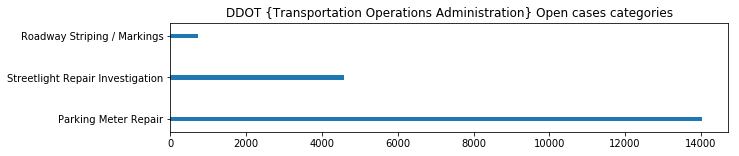

In [243]:
data_df_clean_DDOT_open[data_df_clean_DDOT_open["SERVICETYPECODEDESCRIPTION"]== "Transportation Operations Administration"]['SERVICECODEDESCRIPTION'].value_counts().plot.barh(width=0.1,figsize=(10,2))
plt.title("DDOT {Transportation Operations Administration} Open cases categories")
plt.xlabel("Count")
plt.savefig("DDOT_open cat {Transportation Operations Administration}.png",bbox_inches = 'tight')

(-1.185404606720112,
 1.2090988961685627,
 -1.2123189334080802,
 1.201854326744658)

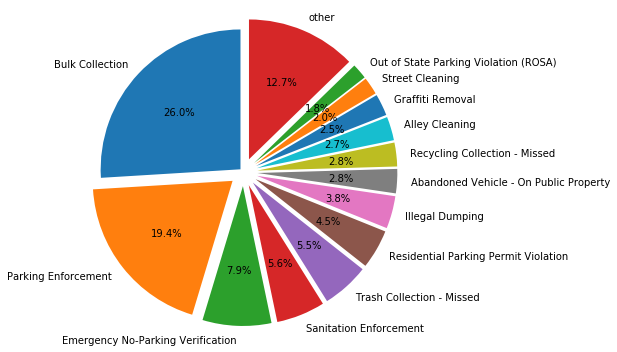

In [78]:
explode = (0.03, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ldf = A_DPW
ldf = ldf.rename("")
ldf.plot.pie(figsize=(6,6),explode=explode,y= data_df_clean.index,shadow=False,startangle=90,autopct='%1.1f%%')
plt.tight_layout
plt.axis('equal')

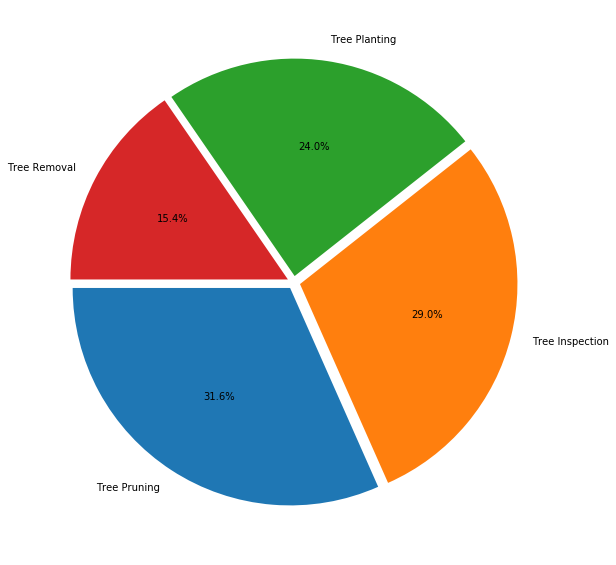

In [79]:
explode = (0.03, 0.03, 0.03, 0.03)
ldf = data_df_clean_DDOT_open[data_df_clean_DDOT_open["SERVICETYPECODEDESCRIPTION"] == "Urban Forrestry"]["SERVICECODEDESCRIPTION"].value_counts()
ldf = ldf.rename("")
ldf.plot.pie(autopct='%1.1f%%',explode=explode,startangle=180)

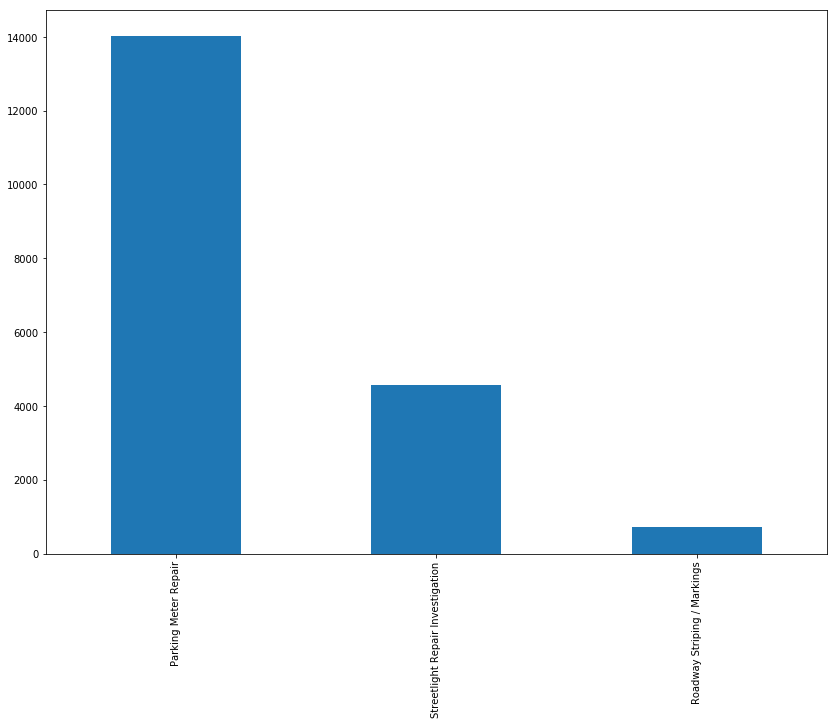

In [80]:
data_df_clean_DDOT_open[data_df_clean_DDOT_open["SERVICETYPECODEDESCRIPTION"] == "Transportation Operations Administration"]["SERVICECODEDESCRIPTION"].value_counts().plot.bar()

#### DDS

In [81]:
data_df_clean_DDS_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DDS") & (data_df_clean["STATUS_CODE"] == "OPEN")]

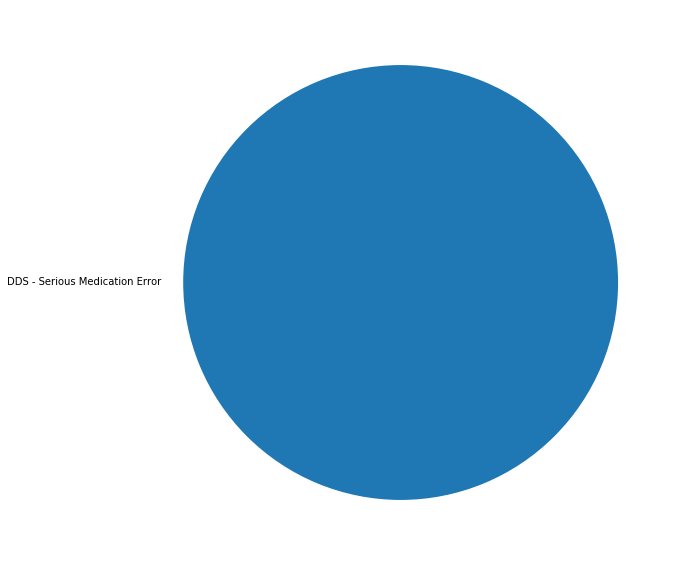

In [82]:
ldf = data_df_clean_DDS_open["SERVICECODEDESCRIPTION"].value_counts()
ldf = ldf.rename("")
ldf.plot.pie()

In [83]:
data_df_clean_DDS_open["SERVICECODEDESCRIPTION"]

20731    DDS - Serious Medication Error
20738    DDS - Serious Medication Error
20740    DDS - Serious Medication Error
20869    DDS - Serious Medication Error
Name: SERVICECODEDESCRIPTION, dtype: object

#### DOEE

In [84]:
data_df_clean_DOEE_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DOEE") & (data_df_clean["STATUS_CODE"] == "OPEN")]

In [85]:
data_df_clean_DOEE_open["SERVICECODEDESCRIPTION"].value_counts()

DOEE - General Environmental Concerns    110
DOEE - Construction – Erosion Runoff      71
DOEE - Engine Idling Tips                  1
DOEE - Energy Benchmarking                 1
Name: SERVICECODEDESCRIPTION, dtype: int64

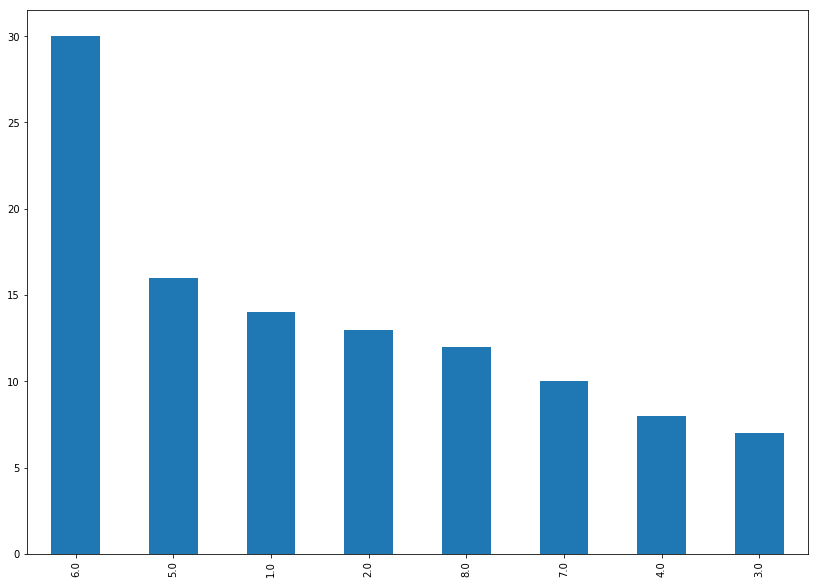

In [86]:
data_df_clean_DOEE_open[data_df_clean_DOEE_open["SERVICECODEDESCRIPTION"] == "DOEE - General Environmental Concerns"]["WARD"].value_counts().plot.bar()

#### ORM

In [87]:
data_df_clean_ORM_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="ORM") & (data_df_clean["STATUS_CODE"] == "OPEN")]

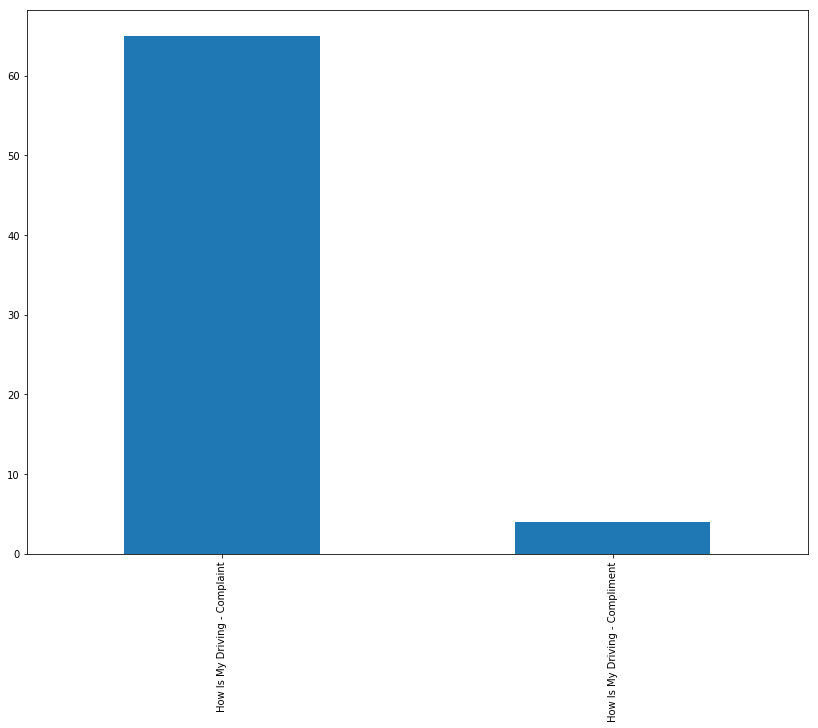

In [88]:
data_df_clean_ORM_open["SERVICECODEDESCRIPTION"].value_counts().plot.bar()

#### FEMS

In [89]:
data_df_clean_FEMS_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="FEMS") & (data_df_clean["STATUS_CODE"] == "OPEN")]

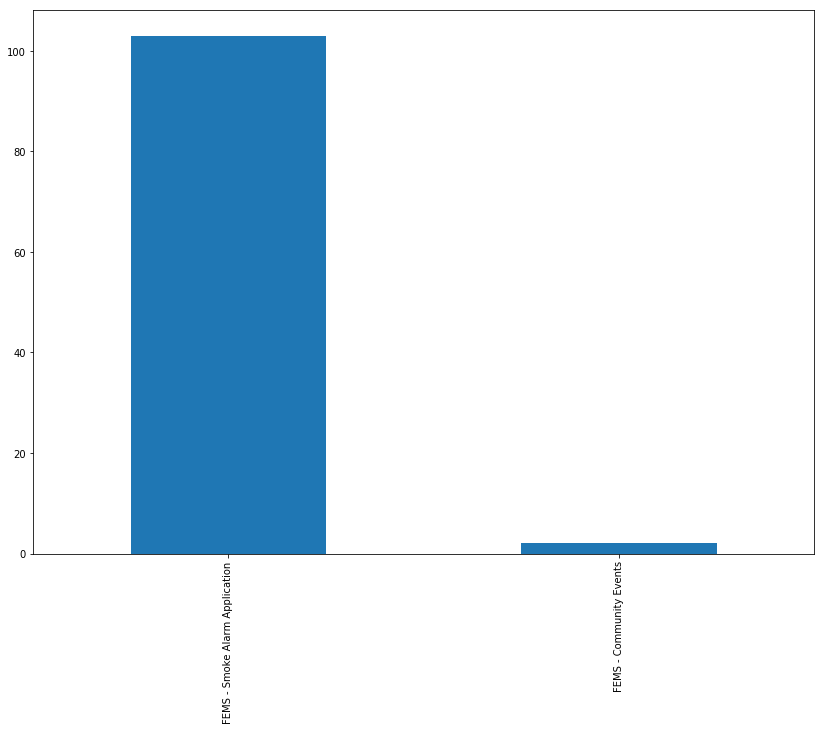

In [90]:
data_df_clean_FEMS_open["SERVICECODEDESCRIPTION"].value_counts().plot.bar()

#### OUC

In [91]:
data_df_clean_OUC_open = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="OUC") & (data_df_clean["STATUS_CODE"] == "OPEN")]

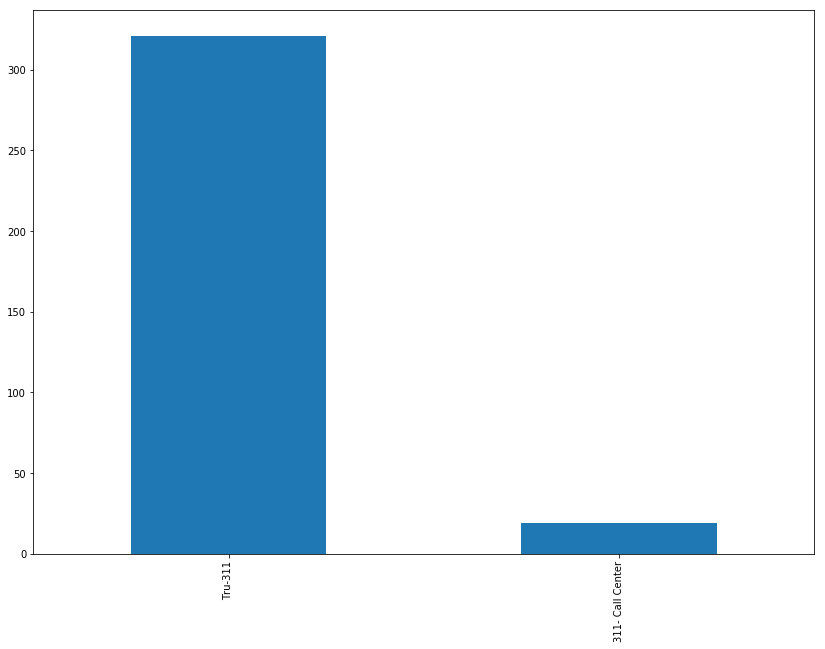

In [92]:
data_df_clean_OUC_open["SERVICETYPECODEDESCRIPTION"].value_counts().plot.bar()

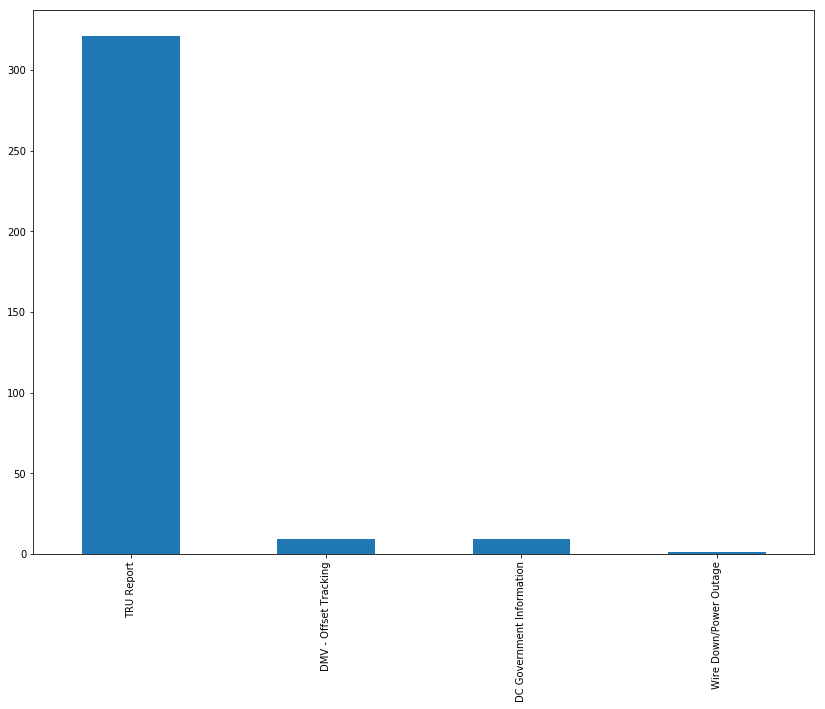

In [93]:
data_df_clean_OUC_open["SERVICECODEDESCRIPTION"].value_counts().plot.bar()

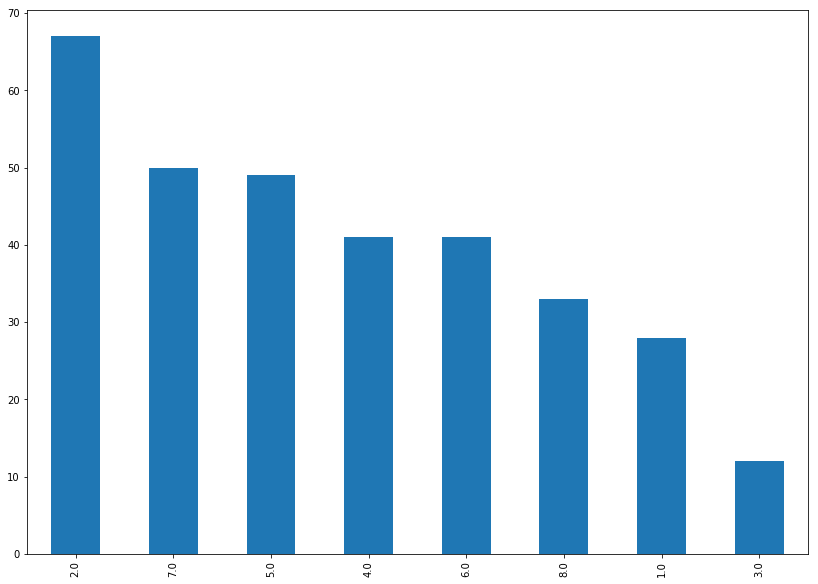

In [94]:
data_df_clean_OUC_open[data_df_clean_OUC_open["SERVICECODEDESCRIPTION"]=="TRU Report"]["WARD"].value_counts().plot.bar()

In [95]:
PRIO_COUNT = (data_df_clean.groupby(["ORGANIZATIONACRONYM"])["SERVICEORDERSTATUS"].value_counts(normalize=True).rename('percentage of cases').mul(100).reset_index().sort_values("ORGANIZATIONACRONYM"))

PRIO_COUNT  

,ORGANIZATIONACRONYM,SERVICEORDERSTATUS,percentage of cases
0,DC-ICH,OPEN,90.476190
1,DC-ICH,CLOSED,4.761905
2,DC-ICH,VOIDED,4.761905
3,DDOT,CLOSED,54.535765
4,DDOT,IN-PROGRESS,45.355694
5,DDOT,OPEN,0.068450
6,DDOT,VOIDED,0.030313
7,DDOT,CLOSED - INCOMPLETE INFORMATION,0.004889
8,DDOT,DUPLICATE (CLOSED),0.004889
9,DDS,OPEN,100.000000


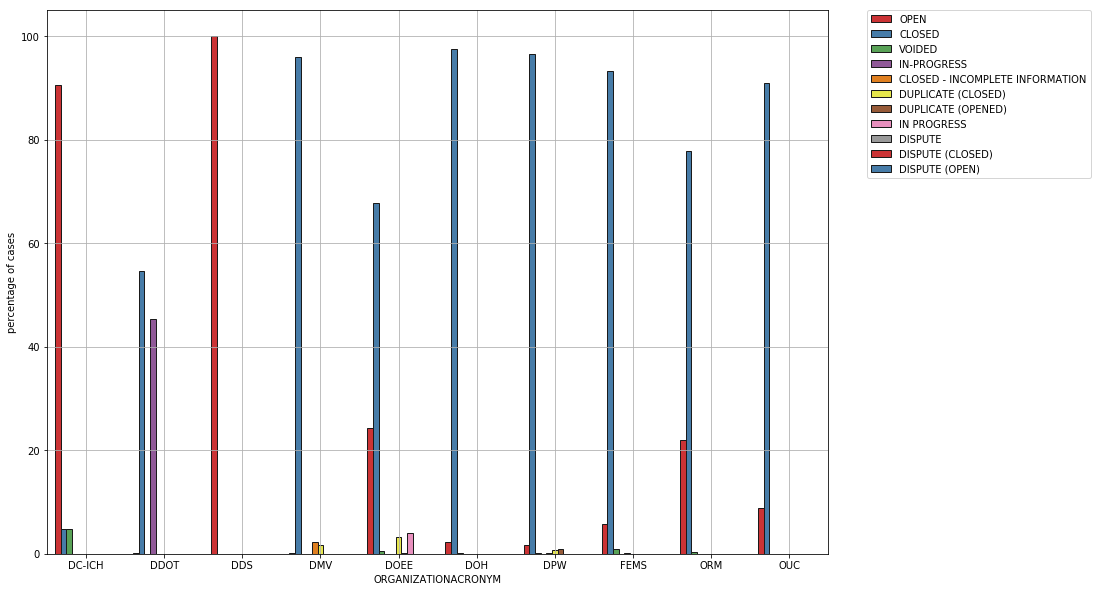

In [96]:
p = sns.barplot(x='ORGANIZATIONACRONYM',y='percentage of cases',data=PRIO_COUNT, hue="SERVICEORDERSTATUS",palette="Set1",edgecolor="0.1")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=(14,10)

In [ ]:
data_try = (data_df_clean.groupby(["ORGANIZATIONACRONYM"]))

In [ ]:
data_td = data_df_clean[data_df_clean["Difference_time"].isna() == False]


In [99]:
PRIO_COUNT = (data_df_clean.groupby(["ORGANIZATIONACRONYM"])["SERVICEORDERSTATUS"].value_counts(normalize=True).rename('percentage of cases').mul(100).reset_index().sort_values("ORGANIZATIONACRONYM"))


In [100]:
PRIO_COUNT

,ORGANIZATIONACRONYM,SERVICEORDERSTATUS,percentage of cases
0,DC-ICH,OPEN,90.476190
1,DC-ICH,CLOSED,4.761905
2,DC-ICH,VOIDED,4.761905
3,DDOT,CLOSED,54.535765
4,DDOT,IN-PROGRESS,45.355694
5,DDOT,OPEN,0.068450
6,DDOT,VOIDED,0.030313
7,DDOT,CLOSED - INCOMPLETE INFORMATION,0.004889
8,DDOT,DUPLICATE (CLOSED),0.004889
9,DDS,OPEN,100.000000


In [108]:
data_df_clean.head()

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,STREETADDRESS,XCOORD,YCOORD,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,Difference_time
0,-76.970417,38.864444,307864,DMV01,DMV - Drivers License/ID Issues,Driver Vehicle Services,DMV,1,2018-01-03 10:14:32+00:00,2018-01-03 10:18:35+00:00,...,2546 NAYLOR ROAD SE,402567.660000,132957.830000,38.864436,-76.970414,20020.0,301454.0,7.0,NaN,0 days 00:04:03
1,-77.021908,38.881287,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,1,2018-01-03 09:40:35+00:00,2018-02-22 08:33:38+00:00,...,NaN,398099.299996,134827.418747,38.881280,-77.021906,20024.0,903906.0,6.0,Traffic signal service request closed to initi...,49 days 22:53:03
2,-77.018693,38.930343,307866,S0316,Recycling Cart Delivery,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:17:13+00:00,2018-01-16 15:18:05+00:00,...,426 KENYON STREET NW,398379.390000,140272.930000,38.930336,-77.018691,20010.0,229343.0,1.0,Closed after ten days no payment received,13 days 05:00:52
3,-77.003177,38.903739,307867,SRC02,Snow/Ice Removal,SNOW,DPW,1,2018-01-03 10:00:39+00:00,2018-01-08 15:34:03+00:00,...,200 - 219 BLOCK OF L STREET NE,399724.610000,137319.480000,38.903731,-77.003175,20002.0,809549.0,6.0,NaN,5 days 05:33:24
4,-76.921593,38.901643,307868,S0031,Bulk Collection,SWMA- Solid Waste Management Admistration,DPW,1,2018-01-03 10:16:53+00:00,2018-01-12 07:28:01+00:00,...,5528 HUNT PLACE NE,406801.370000,137089.690000,38.901635,-76.921591,20019.0,7877.0,7.0,sb - Collected – Close SR,8 days 21:11:08


In [109]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 28 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

In [110]:
data_df_clean["Difference_time"]

0         0 days 00:04:03
1        49 days 22:53:03
2        13 days 05:00:52
3         5 days 05:33:24
4         8 days 21:11:08
5        21 days 11:17:56
6        13 days 16:09:28
7         4 days 23:27:42
8         7 days 23:25:49
9         6 days 21:43:27
10       21 days 11:01:13
11        0 days 01:20:02
12        8 days 00:33:57
13       69 days 04:24:23
14       21 days 10:42:41
15        3 days 22:16:36
16        0 days 22:11:57
17        7 days 23:21:17
18        7 days 23:47:34
19        7 days 02:21:41
20       21 days 10:40:18
21        5 days 05:32:47
22        0 days 00:56:49
23        6 days 22:44:40
24        0 days 00:33:39
25        5 days 05:32:59
26        8 days 01:10:18
27       25 days 22:54:31
28        8 days 00:06:02
29       21 days 10:37:28
               ...       
333075    4 days 13:31:57
333076                NaT
333077                NaT
333078    8 days 15:27:46
333079                NaT
333080                NaT
333081                NaT
333082      

In [111]:
data_df_clean["Days_diff"] = data_df_clean["Difference_time"].astype('timedelta64[D]')


In [112]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 29 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

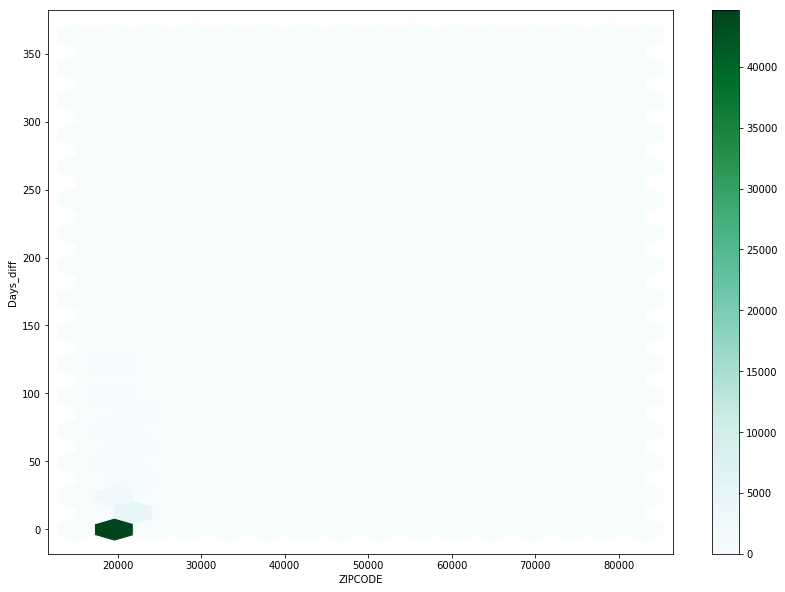

In [113]:
df_new = data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"]=="DDOT") & (data_df_clean["Days_diff"].isna() == False)]
df_new.plot(kind='hexbin',x='ZIPCODE',y='Days_diff',gridsize=(15,15),sharex=False)


In [114]:
data_df_clean.ADDDATE.map(lambda x: x.strftime('%Y-%m'))

0         2018-01
1         2018-01
2         2018-01
3         2018-01
4         2018-01
5         2018-01
6         2018-01
7         2018-01
8         2018-01
9         2018-01
10        2018-01
11        2018-01
12        2018-01
13        2018-01
14        2018-01
15        2018-01
16        2018-01
17        2018-01
18        2018-01
19        2018-01
20        2018-01
21        2018-01
22        2018-01
23        2018-01
24        2018-01
25        2018-01
26        2018-01
27        2018-01
28        2018-01
29        2018-01
           ...   
333075    2018-12
333076    2018-12
333077    2018-12
333078    2018-12
333079    2018-12
333080    2018-12
333081    2018-12
333082    2018-12
333083    2018-12
333084    2018-12
333085    2018-12
333086    2018-12
333087    2018-12
333088    2018-12
333089    2018-12
333090    2018-12
333091    2018-12
333092    2018-12
333093    2018-12
333094    2018-12
333095    2018-12
333096    2018-12
333097    2018-12
333098    2018-12
333099    

In [129]:
df_ddot=data_df_clean[(data_df_clean["ORGANIZATIONACRONYM"] == "DDOT") & (data_df_clean["Days_diff"].isna() == False)]


In [130]:
df_ddot

,X,Y,OBJECTID,SERVICECODE,SERVICECODEDESCRIPTION,SERVICETYPECODEDESCRIPTION,ORGANIZATIONACRONYM,SERVICECALLCOUNT,ADDDATE,RESOLUTIONDATE,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,ZIPCODE,MARADDRESSREPOSITORYID,WARD,DETAILS,Difference_time,Days_diff
1,-77.021908,38.881287,307865,SIGTRAMA,Traffic Signal Issue,Toa- Trans Sys Mnt,DDOT,1,2018-01-03 09:40:35+00:00,2018-02-22 08:33:38+00:00,...,398099.299996,134827.418747,38.881280,-77.021906,20024.0,903906.0,6.0,Traffic signal service request closed to initi...,49 days 22:53:03,49.0
5,-77.033647,38.897837,307869,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:54:24+00:00,2018-01-24 21:12:20+00:00,...,397081.450000,136664.920003,38.897830,-77.033645,20005.0,803528.0,2.0,DDOT%e2%80%99s Parking and Ground Transportati...,21 days 11:17:56,21.0
8,-77.084318,38.959047,307872,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:52:40+00:00,2018-01-11 09:18:29+00:00,...,392692.150000,143462.500003,38.959039,-77.084316,20015.0,808524.0,3.0,DDOT%e2%80%99s Parking and Ground Transportati...,7 days 23:25:49,7.0
10,-77.028087,38.897837,307874,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 10:16:35+00:00,2018-01-24 21:17:48+00:00,...,397563.780000,136664.650003,38.897829,-77.028084,20004.0,807130.0,2.0,DDOT%e2%80%99s Parking and Ground Transportati...,21 days 11:01:13,21.0
13,-77.000943,38.906428,307877,S0021,Bicycle Services,Department of Transportation,DDOT,1,2018-01-03 10:59:09+00:00,2018-03-13 15:23:32+00:00,...,399918.430000,137618.010000,38.906421,-77.000940,20002.0,70272.0,6.0,New bike lane request is under review.,69 days 04:24:23,69.0
14,-77.062766,38.903015,307878,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:55:14+00:00,2018-01-24 20:37:55+00:00,...,394555.900000,137240.980003,38.903007,-77.062763,20007.0,803006.0,2.0,DDOT%e2%80%99s Parking and Ground Transportati...,21 days 10:42:41,21.0
17,-77.015945,38.975300,307881,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:58:51+00:00,2018-01-11 09:20:08+00:00,...,398618.520000,145263.540000,38.975293,-77.015943,20012.0,245144.0,4.0,DDOT%e2%80%99s Parking and Ground Transportati...,7 days 23:21:17,7.0
20,-77.062766,38.903015,307884,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:57:36+00:00,2018-01-24 20:37:54+00:00,...,394555.900000,137240.980003,38.903007,-77.062763,20007.0,803006.0,2.0,DDOT%e2%80%99s Parking and Ground Transportati...,21 days 10:40:18,21.0
29,-77.020907,38.883246,307893,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 09:50:53+00:00,2018-01-24 20:28:21+00:00,...,398186.230000,135044.870003,38.883239,-77.020905,20024.0,808818.0,6.0,DDOT%e2%80%99s Parking and Ground Transportati...,21 days 10:37:28,21.0
30,-77.000050,38.919949,307894,S0276,Parking Meter Repair,Transportation Operations Administration,DDOT,1,2018-01-03 10:10:35+00:00,2018-01-11 09:17:38+00:00,...,399995.900000,139118.920003,38.919941,-77.000047,20002.0,801957.0,5.0,DDOT%e2%80%99s Parking and Ground Transportati...,7 days 23:07:03,7.0


In [131]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 29 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

In [132]:

data_df_clean["Month"] = data_df_clean["ADDDATE"].dt.month

In [133]:
data_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333105 entries, 0 to 333104
Data columns (total 30 columns):
X                             333105 non-null float64
Y                             333105 non-null float64
OBJECTID                      333105 non-null int64
SERVICECODE                   333105 non-null object
SERVICECODEDESCRIPTION        333105 non-null object
SERVICETYPECODEDESCRIPTION    333104 non-null object
ORGANIZATIONACRONYM           333104 non-null object
SERVICECALLCOUNT              333105 non-null int64
ADDDATE                       333105 non-null datetime64[ns, UTC]
RESOLUTIONDATE                280349 non-null datetime64[ns, UTC]
SERVICEDUEDATE                333096 non-null datetime64[ns, UTC]
SERVICEORDERDATE              333105 non-null datetime64[ns, UTC]
INSPECTIONFLAG                333105 non-null object
INSPECTIONDATE                25922 non-null datetime64[ns, UTC]
SERVICEORDERSTATUS            333105 non-null object
STATUS_CODE                   

In [134]:
df_ddot=data_df_clean[(data_df_clean["Month"] ==1)& (data_df_clean["Days_diff"].isna() == False)]
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

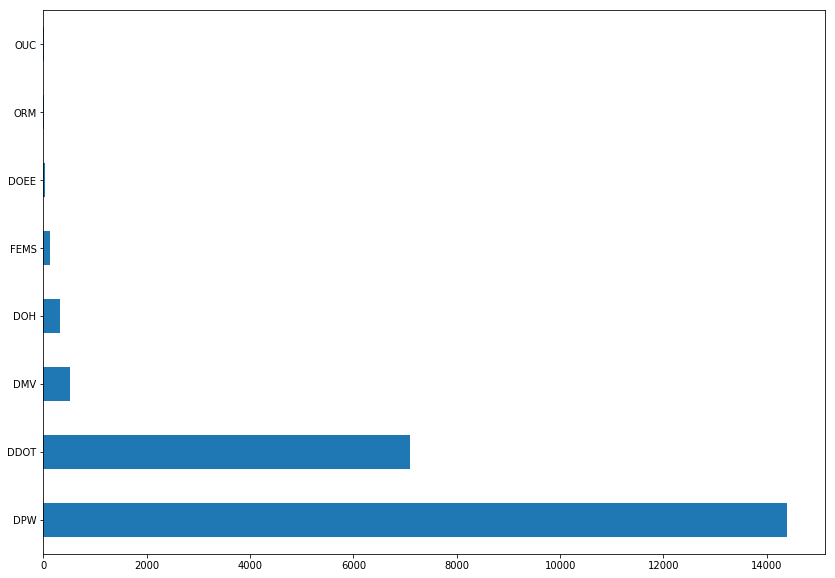

In [135]:
data_df_clean[(data_df_clean["Month"]==12)]["ORGANIZATIONACRONYM"].value_counts().plot.barh()

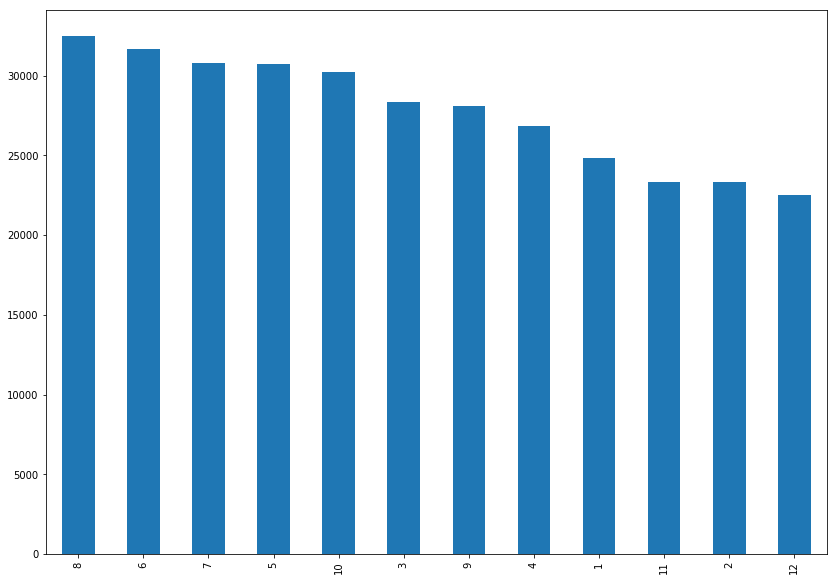

In [136]:
data_df_clean["Month"].value_counts().plot.bar()
plt1 = plt.bar

In [153]:
Month_COUNT = (data_df_clean.groupby(["Month"])["ORGANIZATIONACRONYM"].value_counts().rename('# of cases').reset_index().sort_values("Month"))





In [154]:
Month_COUNT_WARD = (data_df_clean.groupby(["Month"])["WARD"].value_counts().rename('# of cases').reset_index().sort_values("Month"))


In [155]:
Month_COUNT_WARD_ORG = (data_df_clean.groupby(["WARD"])["ORGANIZATIONACRONYM"].value_counts().rename('# of cases').reset_index().sort_values("WARD"))


In [156]:
Month_COUNT

,Month,ORGANIZATIONACRONYM,# of cases
0,1,DPW,16250
1,1,DDOT,6986
2,1,DMV,670
3,1,DOH,319
4,1,OUC,314
5,1,FEMS,171
6,1,DOEE,71
7,1,ORM,21
8,1,DC-ICH,13
9,1,DDS,4


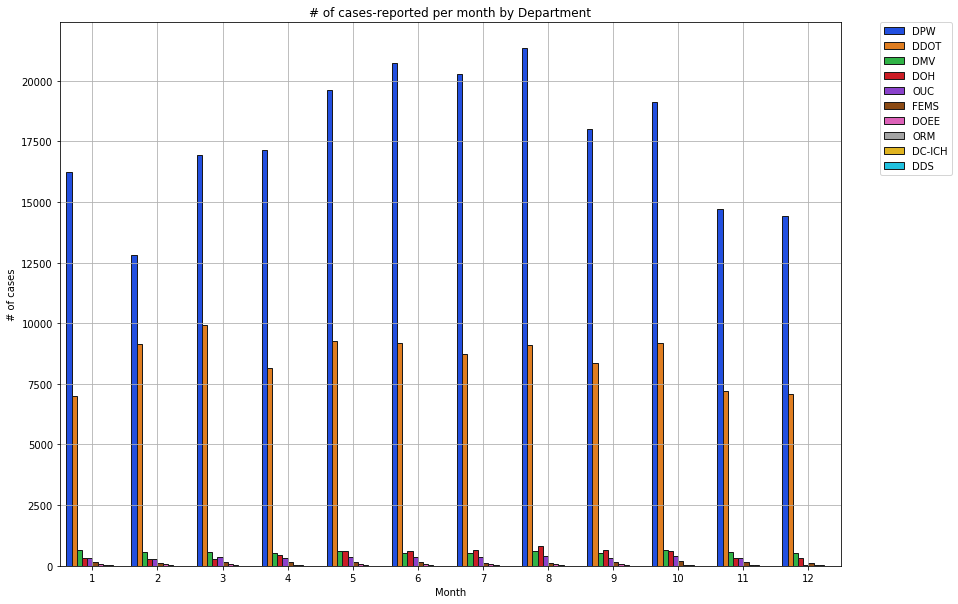

In [157]:
p = sns.barplot(x='Month',y='# of cases',data=Month_COUNT, hue="ORGANIZATIONACRONYM",palette="bright",edgecolor="0.1")
plt.grid(True)
plt.title("# of cases-reported per month by Department")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=(14,10)

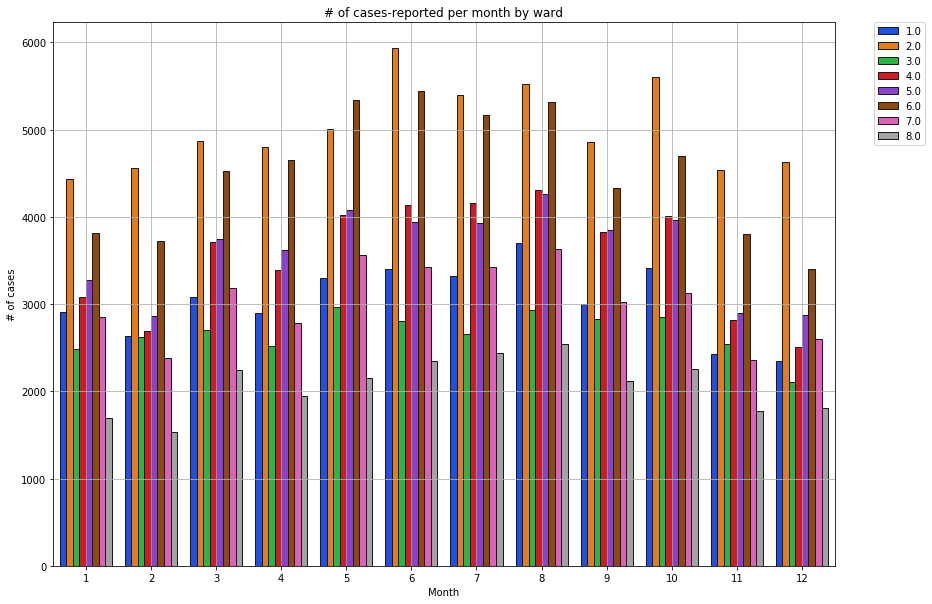

In [158]:
p = sns.barplot(x='Month',y='# of cases',data=Month_COUNT_WARD, hue="WARD",palette="bright",edgecolor="0.1")
plt.grid(True)
plt.title("# of cases-reported per month by ward")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=(14,10)

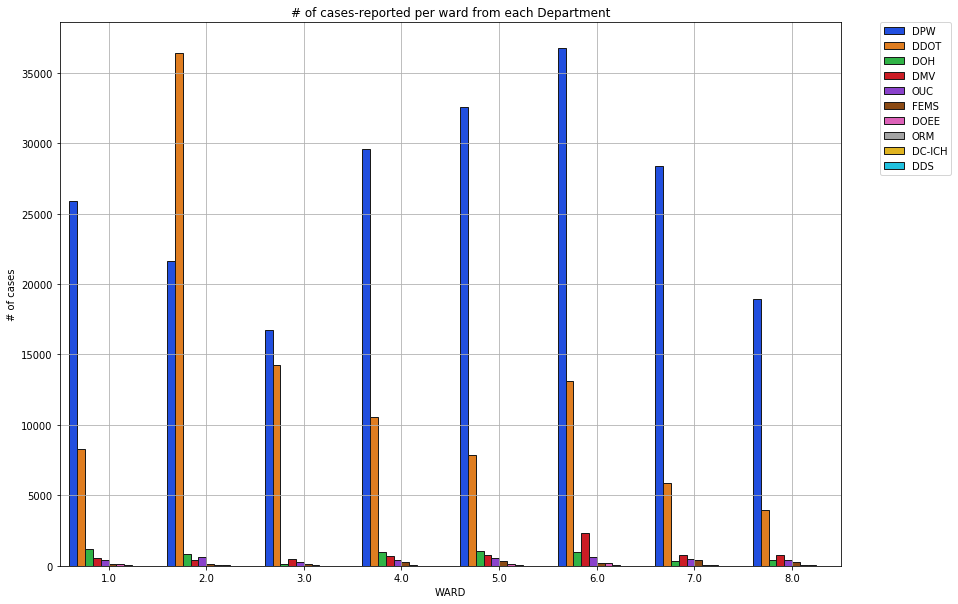

In [159]:
q = sns.barplot(x='WARD',y='# of cases',data=Month_COUNT_WARD_ORG, hue="ORGANIZATIONACRONYM",palette="bright",edgecolor="0.1")
plt.grid(True)
plt.title("# of cases-reported per ward from each Department")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['figure.figsize']=(14,10)

In [ ]:
Month_COUNT

In [ ]:
data_df_clean["Month"].value_counts().plot.bar()